In [1]:
import geopandas as gpd
import sys
sys.path.insert(1, 'D:\osm-transitgraph')
from AccessibilityEvaluators import AccessibilityEvaluator, GeneralAccessibilityEvaluator
time=780
epsg=32646

gpkg=r'D:\osm-transitgraph\kja\kja_tests.gpkg'
zones=gpd.read_file(gpkg, layer='kja_zones')
#zones=zones.loc[zones['core']==True]

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\gamma\AppData\Local\Temp\ipykernel_19052\534804722.py:3: SyntaxWarning: invalid escape sequence '\o'
  sys.path.insert(1, 'D:\osm-transitgraph')


In [ ]:
raptor_all=gpd.read_file(gpkg, layer='td_int3_all')
raptor_all['traveltime']=raptor_all['arrival']-raptor_all['start']
raptor_all_time=raptor_all.loc[raptor_all['start']==time]
evaller_all=AccessibilityEvaluator(raptor_all_time, zones.copy(), 'all')

raptor_lim=gpd.read_file(gpkg, layer='td_int3_lim')
raptor_lim['traveltime']=raptor_lim['arrival']-raptor_lim['start']
raptor_lim_time=raptor_lim.loc[raptor_lim['start']==time]
evaller_lim=AccessibilityEvaluator(raptor_lim_time, zones.copy(), 'lim')

raptor_wh=gpd.read_file(gpkg, layer='td_int3_wh')
raptor_wh['traveltime']=raptor_wh['arrival']-raptor_wh['start']
raptor_wh_time=raptor_wh.loc[raptor_wh['start']==time]
evaller_wh=AccessibilityEvaluator(raptor_wh_time, zones.copy(), 'wh')

In [ ]:
evaller_all.get_spatial_bandwidth(epsg=epsg)

zones_all = evaller_all.zones
zones_all.to_file(gpkg, layer=f'zones_core_all_{time}')

Evaluating A0


100%|██████████| 242/242 [00:01<00:00, 152.98it/s]


Evaluating A1


100%|██████████| 242/242 [00:01<00:00, 154.70it/s]


Evaluating A2


100%|██████████| 242/242 [00:01<00:00, 140.70it/s]


Evaluating A3


100%|██████████| 242/242 [00:01<00:00, 146.17it/s]


Evaluating spatial bandwidth complete


In [ ]:
evaller_lim.get_spatial_bandwidth(epsg=epsg)

zones_lim = evaller_lim.zones
zones_lim.to_file(gpkg, layer=f'zones_core_lim_{time}')

Evaluating A0


100%|██████████| 242/242 [00:01<00:00, 157.25it/s]


Evaluating A1


100%|██████████| 242/242 [00:01<00:00, 150.04it/s]


Evaluating A2


100%|██████████| 242/242 [00:01<00:00, 142.75it/s]


Evaluating A3


100%|██████████| 242/242 [00:01<00:00, 148.85it/s]


Evaluating spatial bandwidth complete


In [ ]:
evaller_wh.get_spatial_bandwidth(epsg=epsg)

zones_wh = evaller_wh.zones
zones_wh.to_file(gpkg, layer=f'zones_core_wh_{time}')

Evaluating A0


100%|██████████| 242/242 [00:01<00:00, 212.54it/s]


Evaluating A1


100%|██████████| 242/242 [00:01<00:00, 175.85it/s]


Evaluating A2


100%|██████████| 242/242 [00:01<00:00, 156.96it/s]


Evaluating A3


100%|██████████| 242/242 [00:01<00:00, 149.02it/s]

Evaluating spatial bandwidth complete


In [ ]:
od_all = evaller_all.get_od_matrix(epsg=epsg)
od_lim = evaller_lim.get_od_matrix(epsg=epsg)
od_wh = evaller_wh.get_od_matrix(epsg=epsg)

100%|██████████| 242/242 [00:38<00:00,  6.35it/s]


In [7]:
od_all.to_csv(f'D:\osm-transitgraph\kja\kja_core_od_matrix_all_{time}.csv')
od_lim.to_csv(f'D:\osm-transitgraph\kja\kja_core_od_matrix_lim_{time}.csv')
od_wh.to_csv(f'D:\osm-transitgraph\kja\kja_core_od_matrix_wh_{time}.csv')

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\gamma\AppData\Local\Temp\ipykernel_7584\4019261471.py:1: SyntaxWarning: invalid escape sequence '\o'
  od_all.to_csv(f'D:\osm-transitgraph\kja\kja_core_od_matrix_all_{time}.csv')
C:\Users\gamma\AppData\Local\Temp\ipykernel_7584\4019261471.py:2: SyntaxWarning: invalid escape sequence '\o'
  od_lim.to_csv(f'D:\osm-transitgraph\kja\kja_core_od_matrix_lim_{time}.csv')
C:\Users\gamma\AppData\Local\Temp\ipykernel_7584\4019261471.py:3: SyntaxWarning: invalid escape sequence '\o'
  od_wh.to_csv(f'D:\osm-transitgraph\kja\kja_core_od_matrix_wh_{time}.csv')


In [ ]:
od_v=od_all.copy()
od_v.rename(columns={'arrival': 'arrival_all', 'transfers': 'transfers_all'}, inplace=True)

od_v['arrival_wh']=od_wh['arrival']
od_v['transfers_wh']=od_wh['transfers']
od_v

In [8]:
ga=GeneralAccessibilityEvaluator(zones_all, zones_wh, restr_type='wh', time=time)

In [9]:
ga.measure_A()

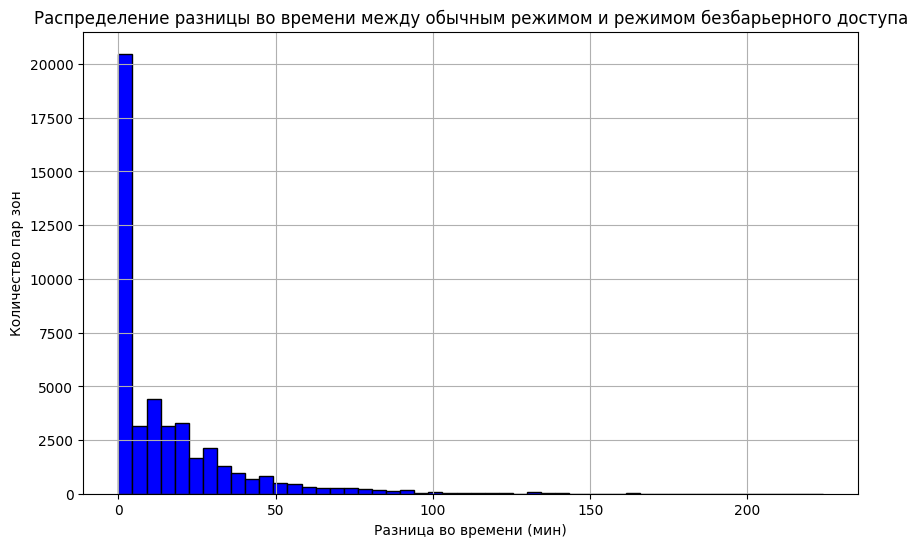

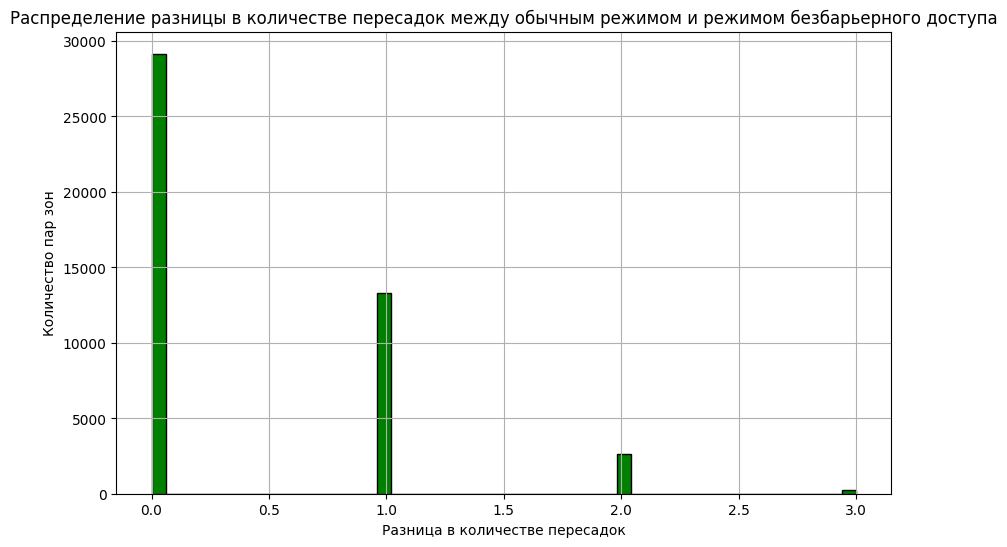

In [10]:
ga.measure_Traveltime(od_all, od_wh, subtract=True, plot=True)

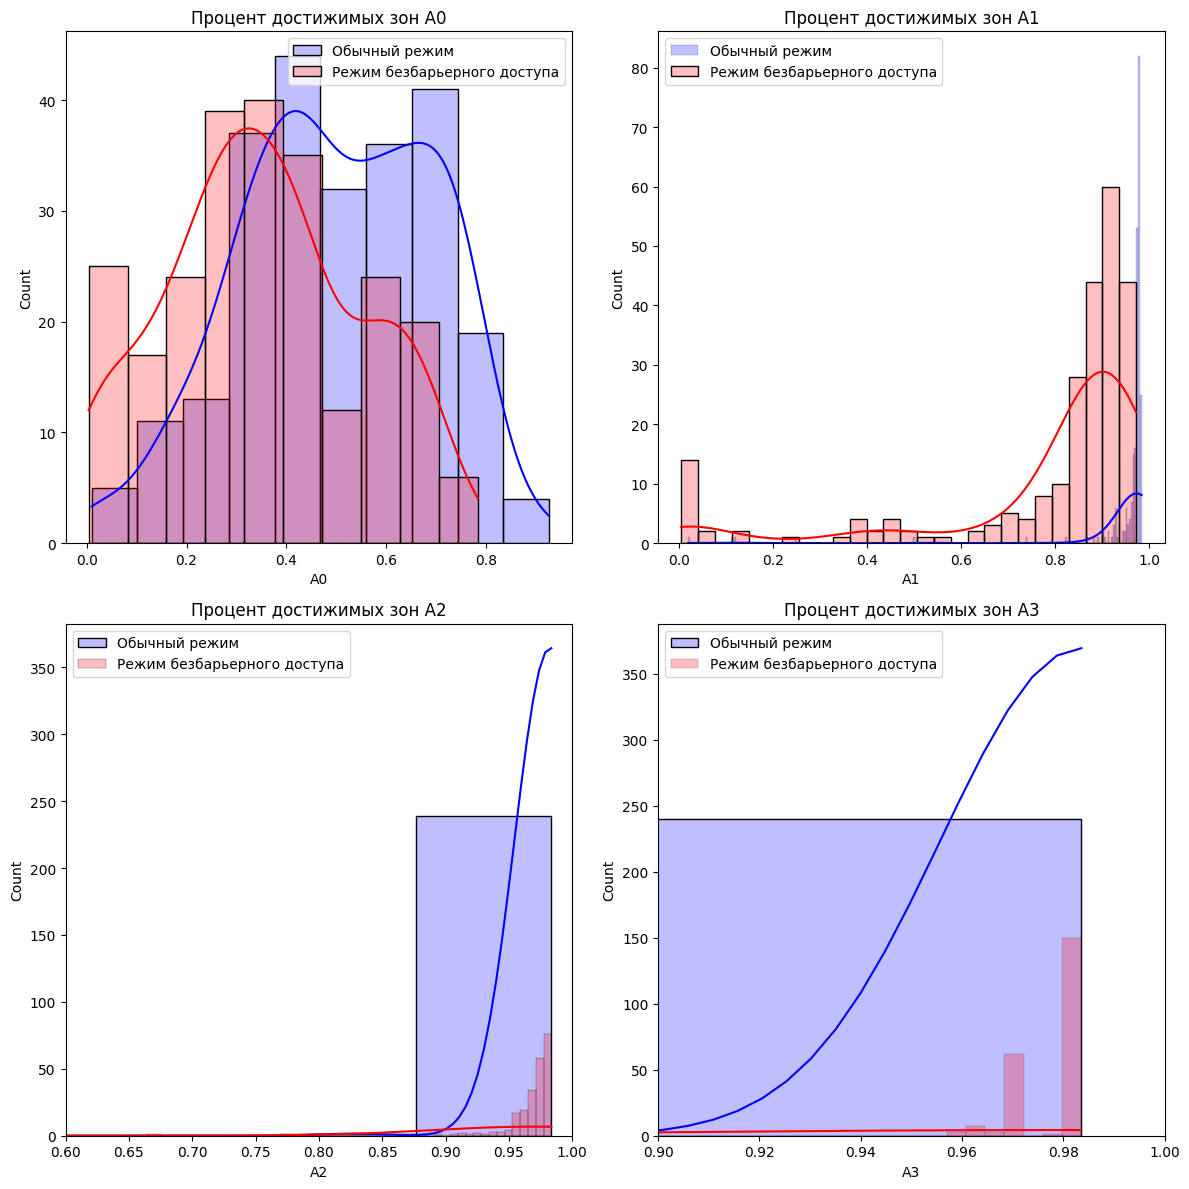

In [11]:
ga.plot_distribution()

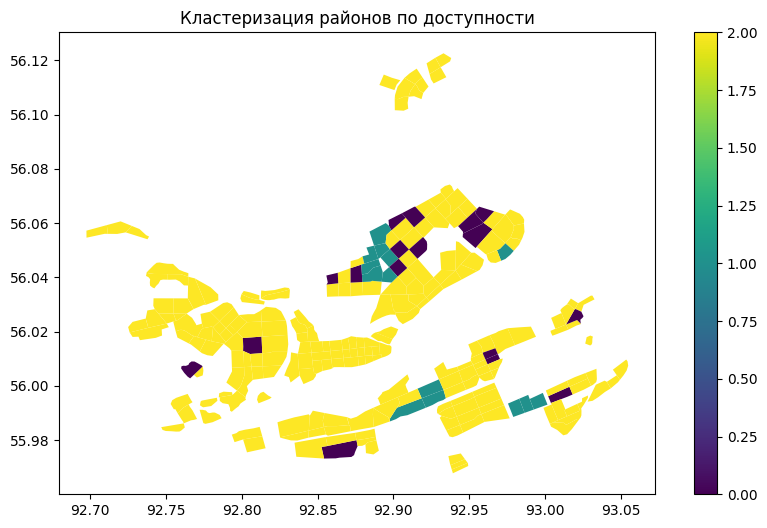

In [12]:
ga.clusterize(plot=True)

In [ ]:
ga.save_measures(gpkg=gpkg, lr=f'zones_core_values_{time}')

In [1]:
import geopandas as gpd
import sys
sys.path.insert(1, 'D:\osm-transitgraph')
from AccessibilityEvaluators import AccessibilityEvaluator, GeneralAccessibilityEvaluator
time=780
epsg=32646

gpkg=r'D:\osm-transitgraph\kja\kja_tests.gpkg'
zones=gpd.read_file(gpkg, layer='kja_zones')
#zones=zones.loc[zones['core']==True]

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Ivan Gamma\AppData\Local\Temp\ipykernel_2044\534804722.py:3: SyntaxWarning: invalid escape sequence '\o'
  sys.path.insert(1, 'D:\osm-transitgraph')


480


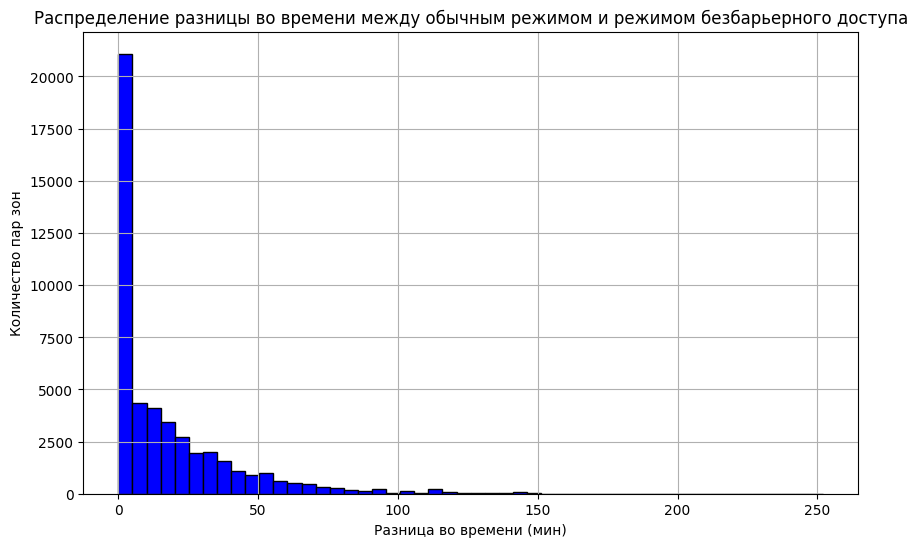

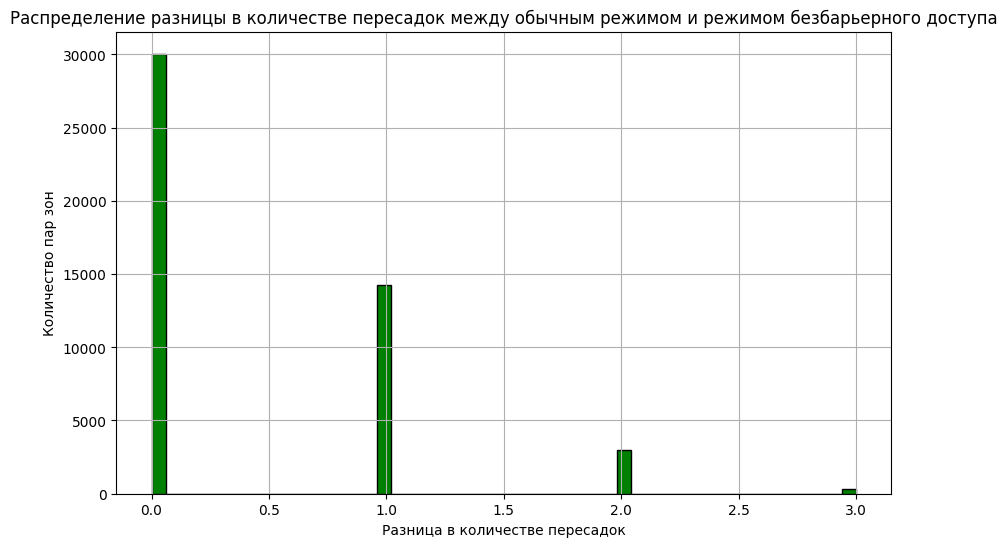

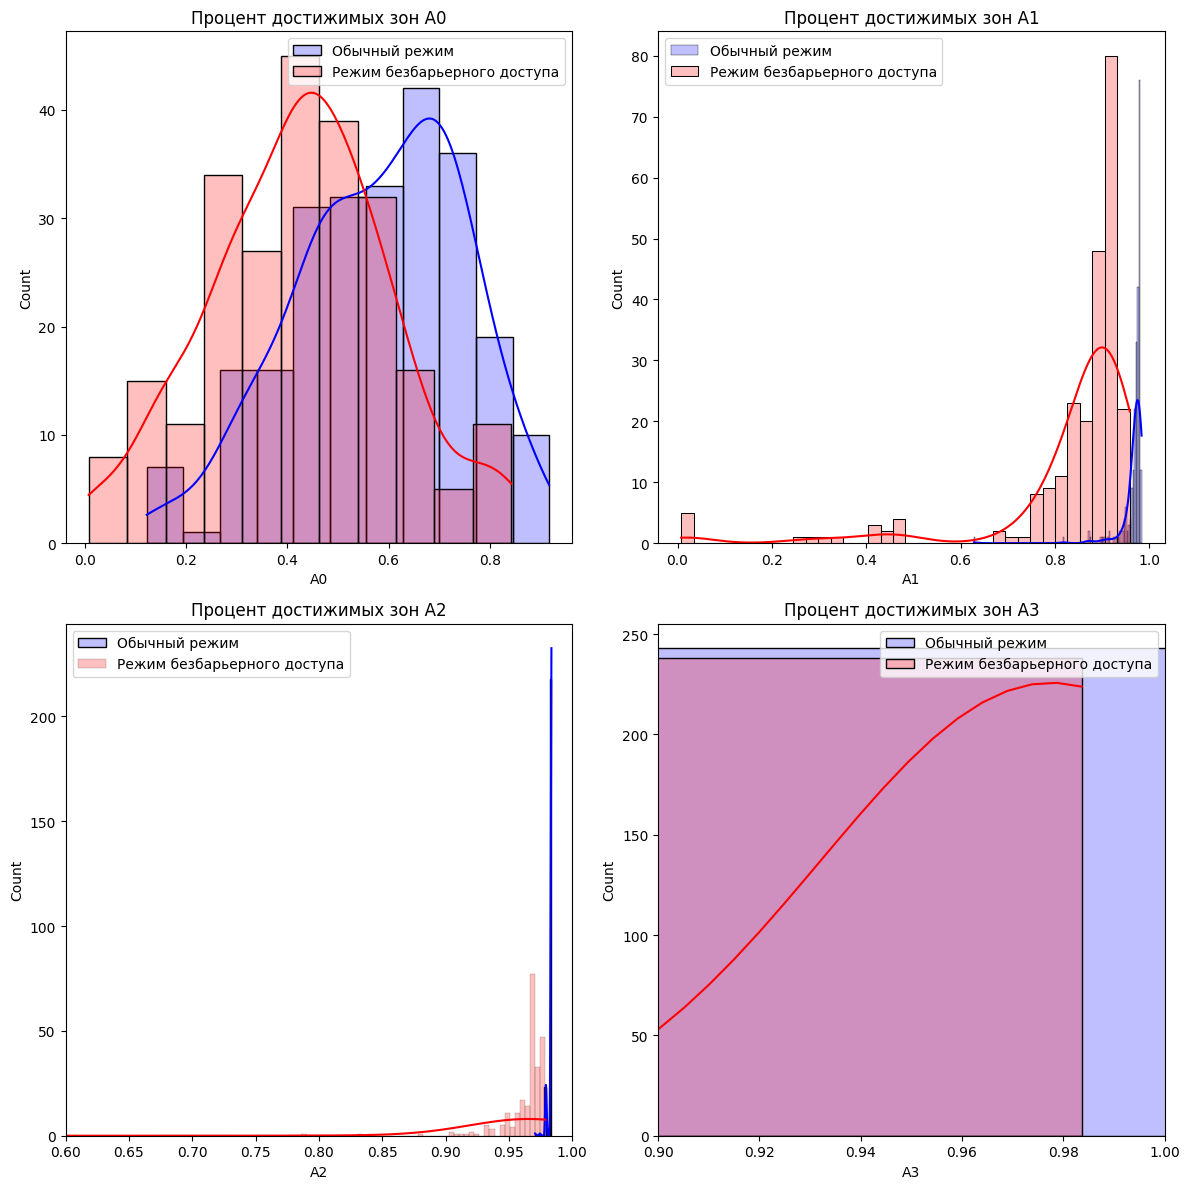

540


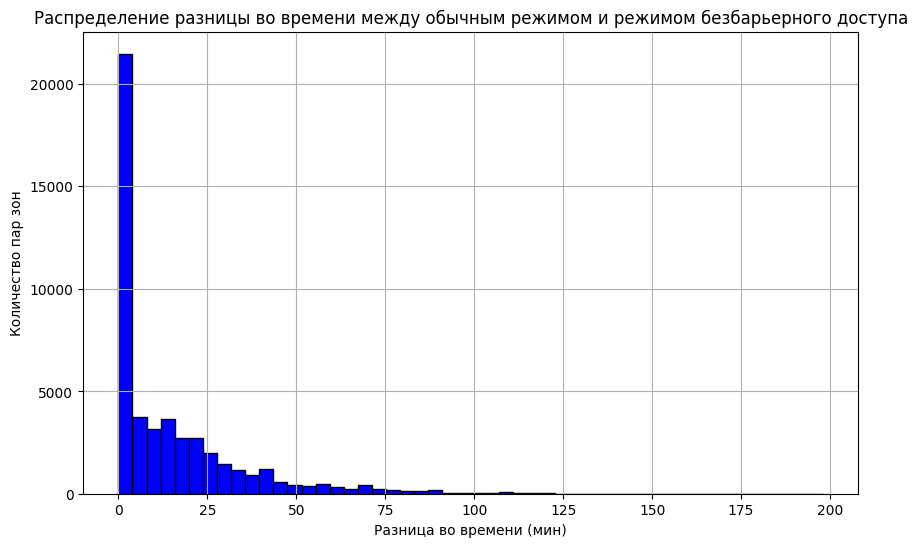

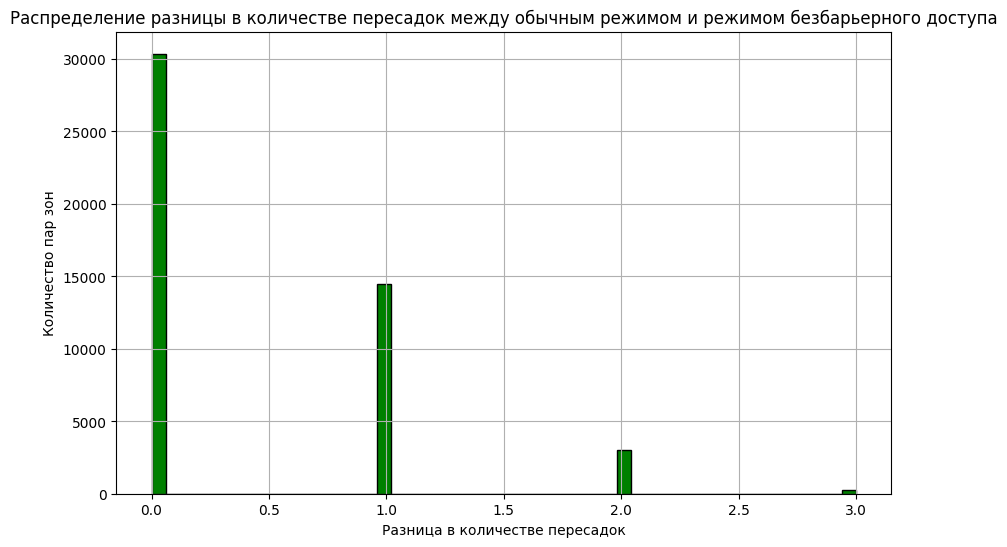

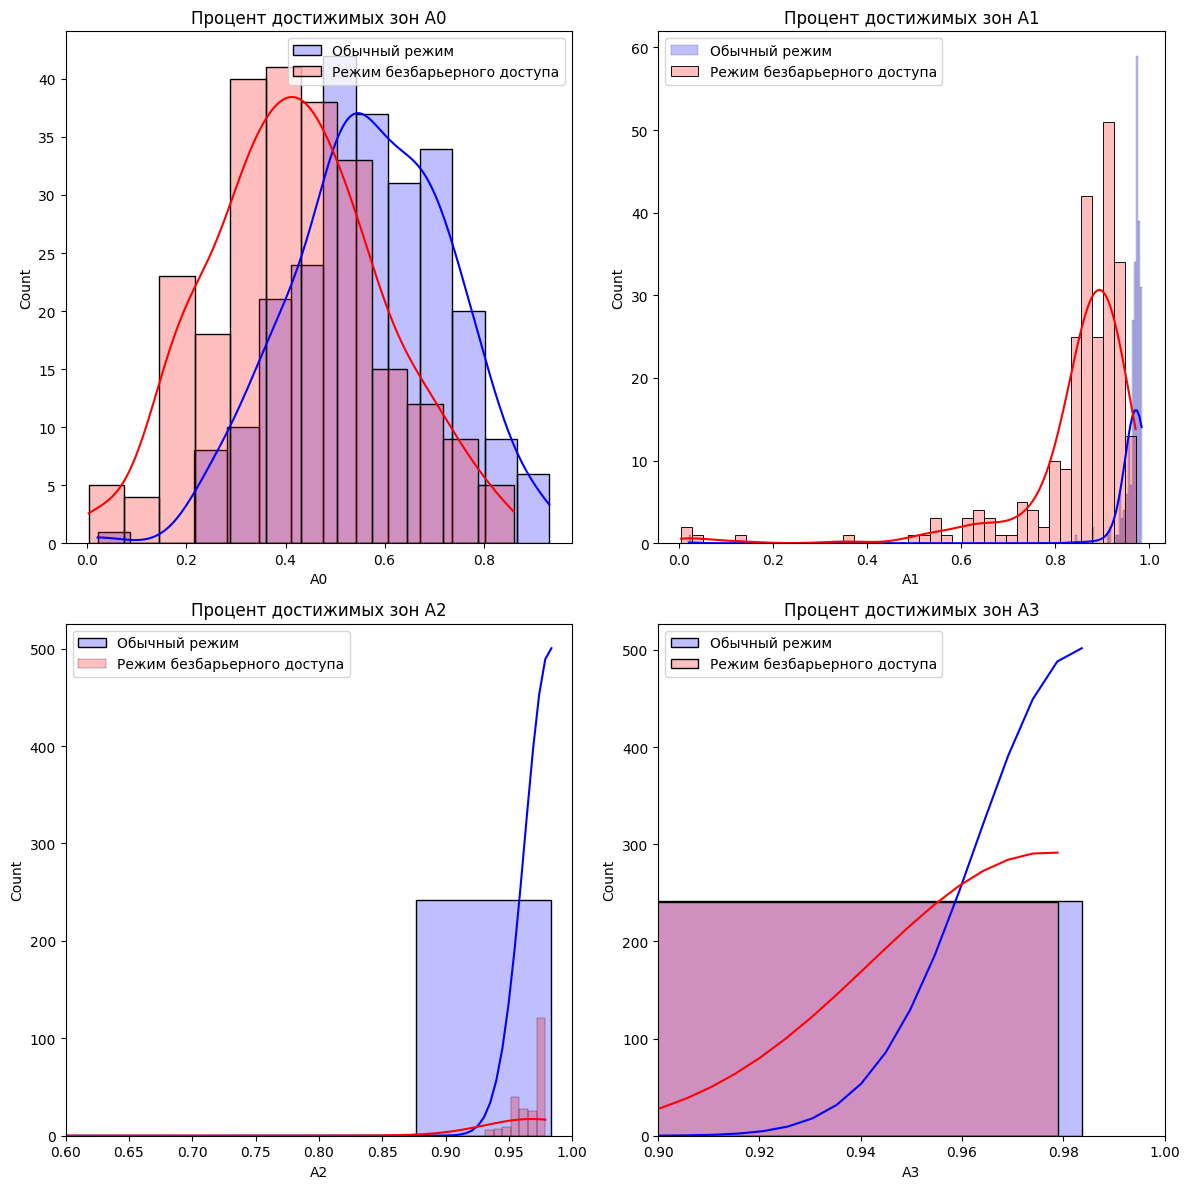

600


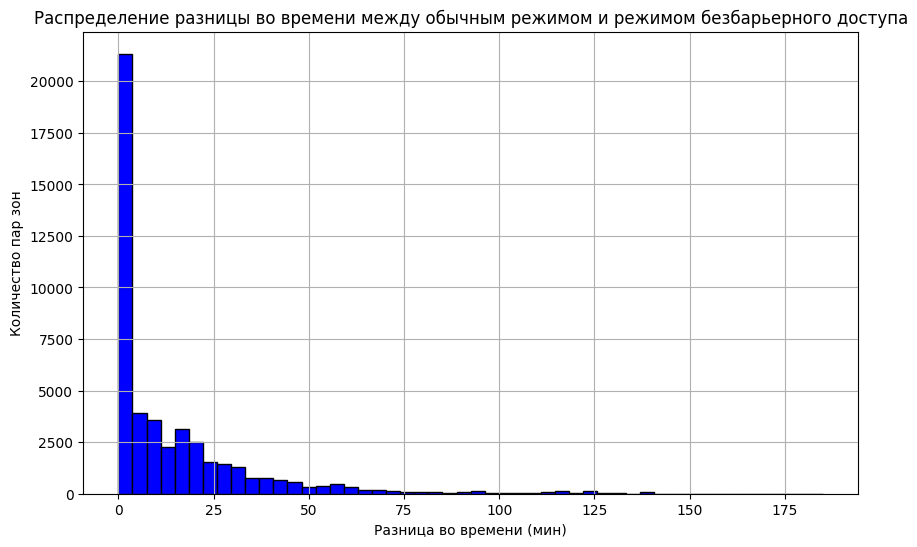

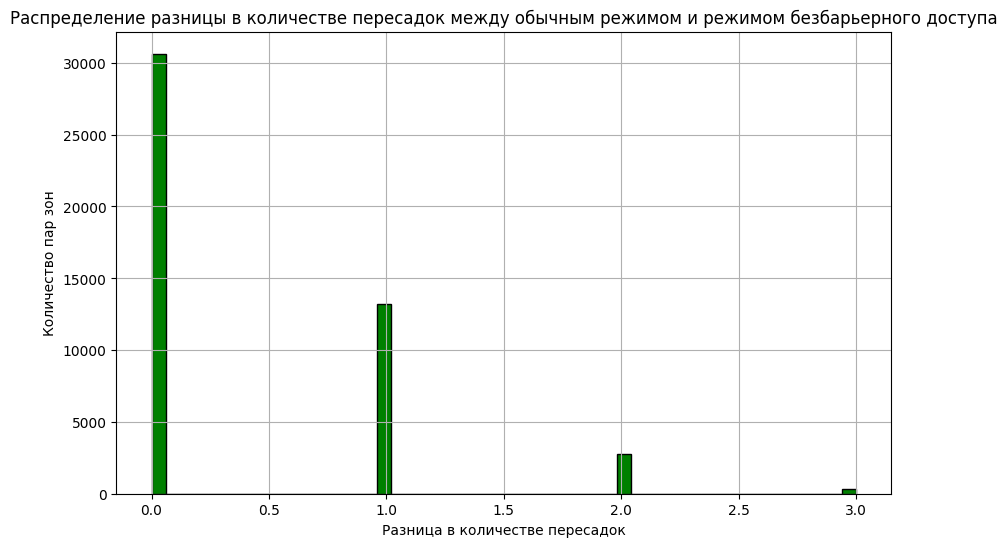

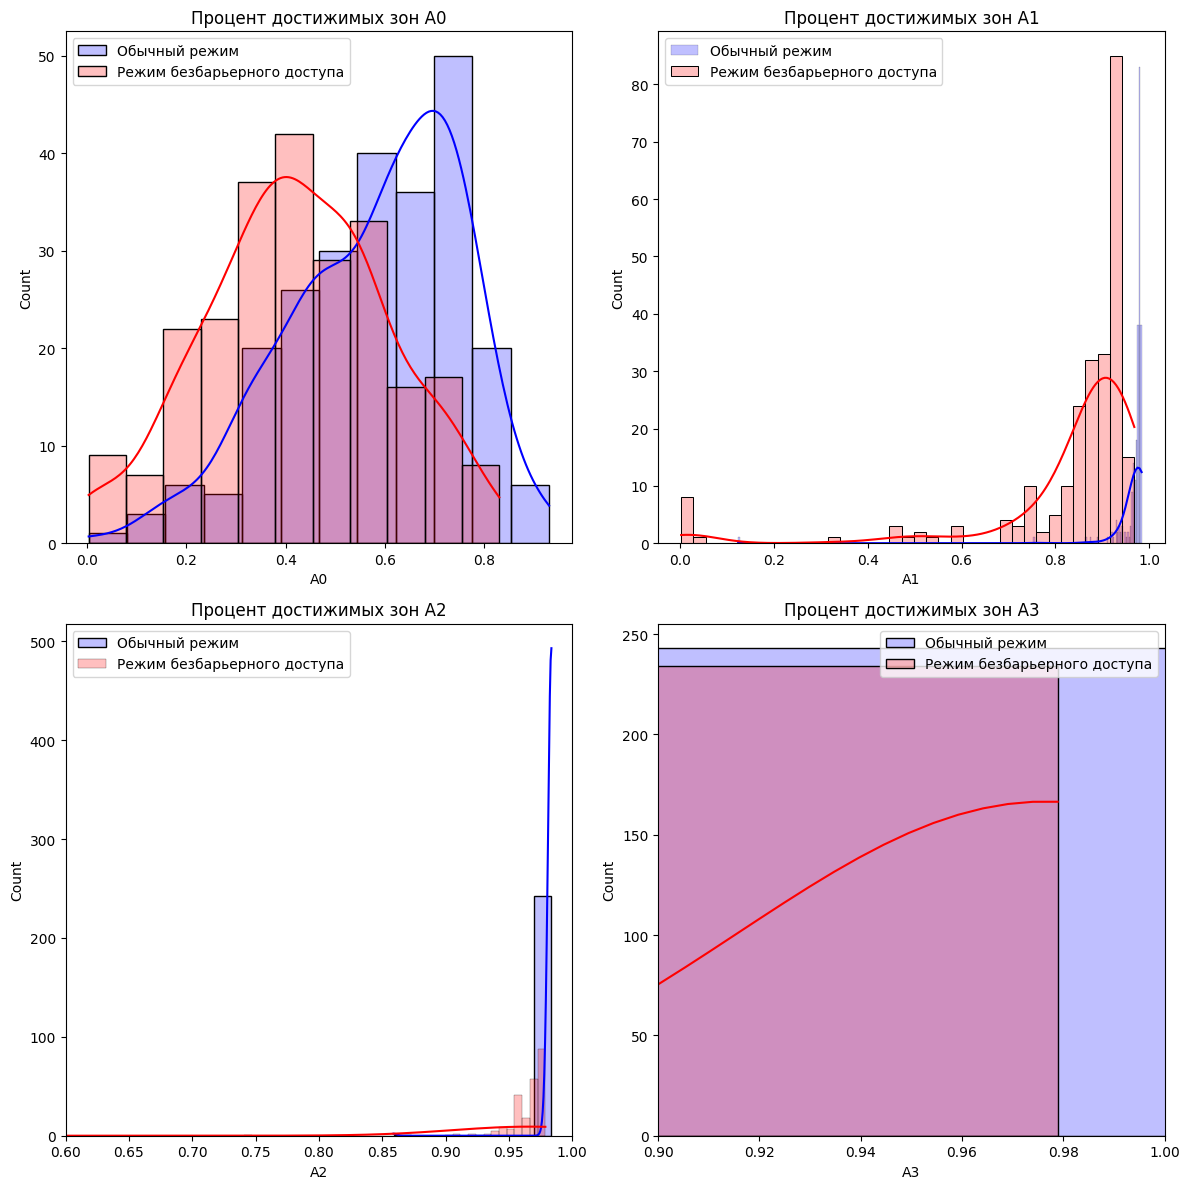

660


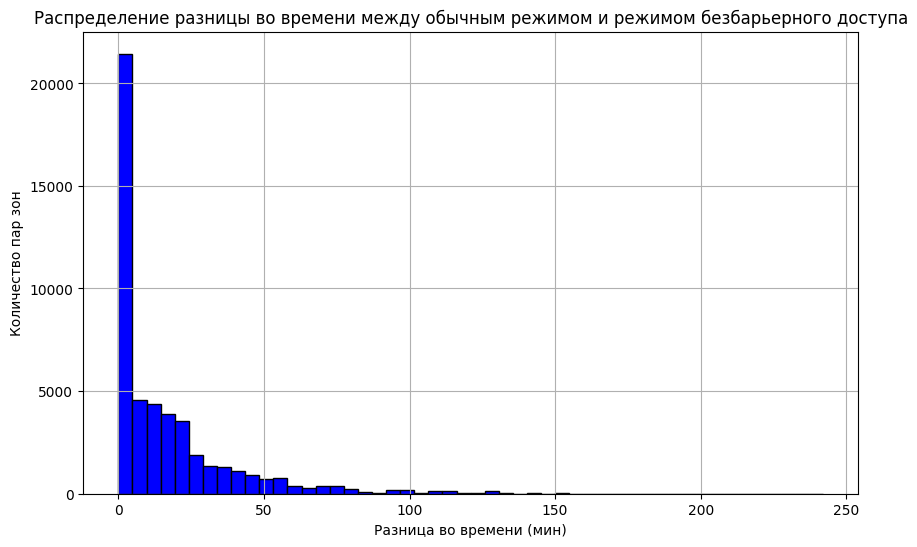

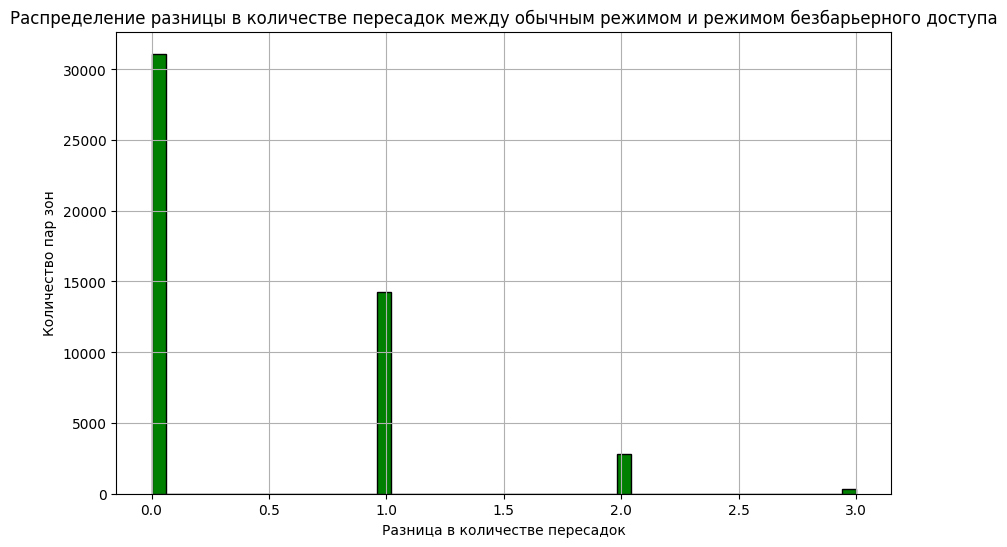

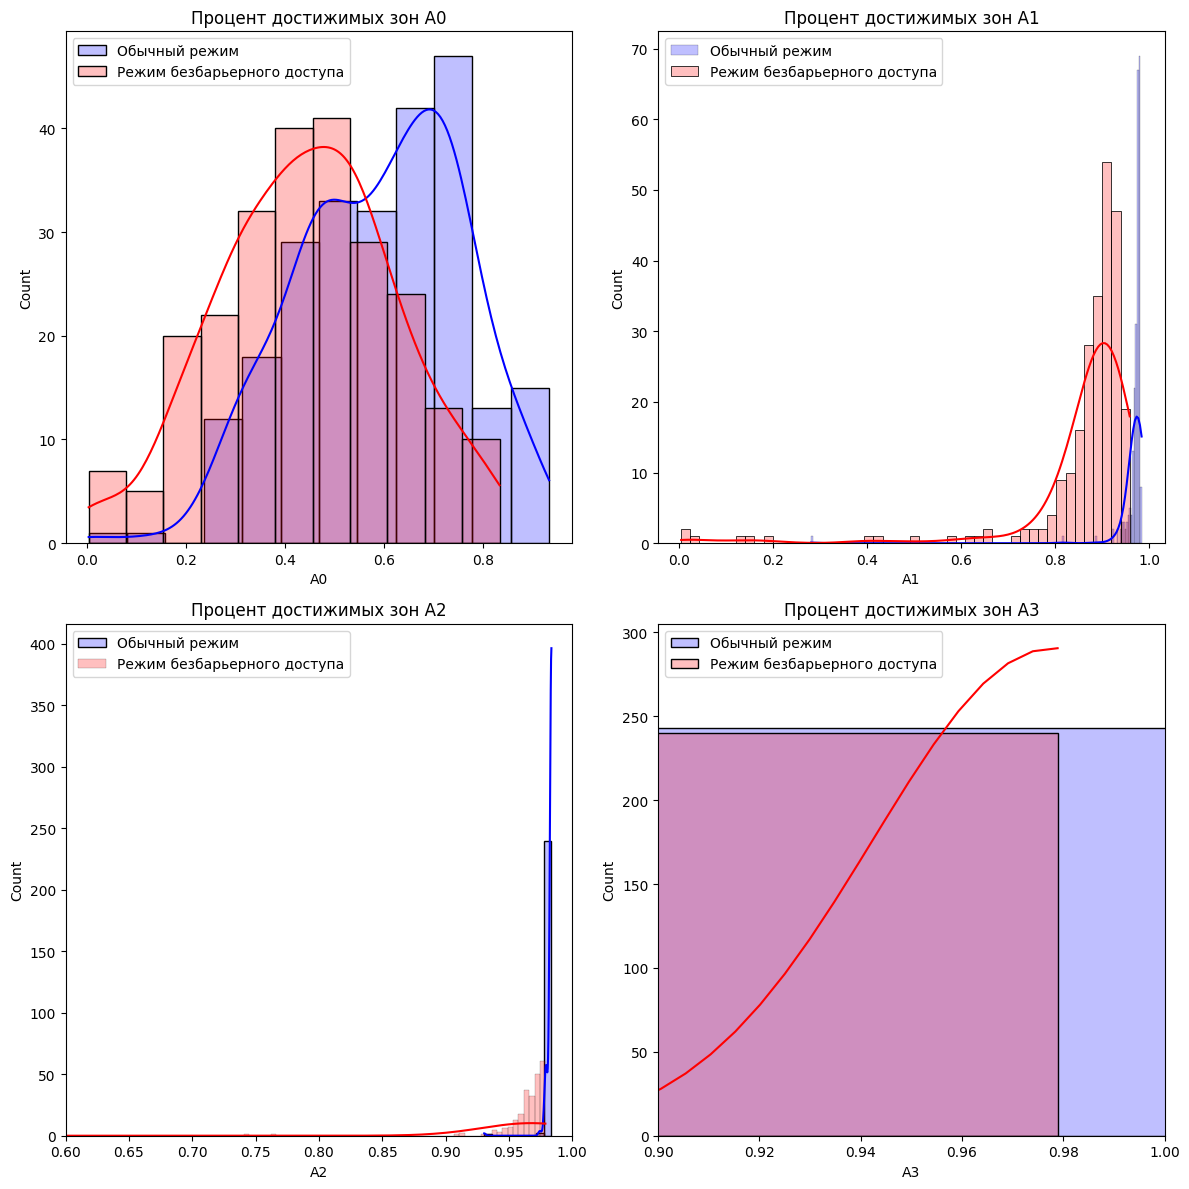

720


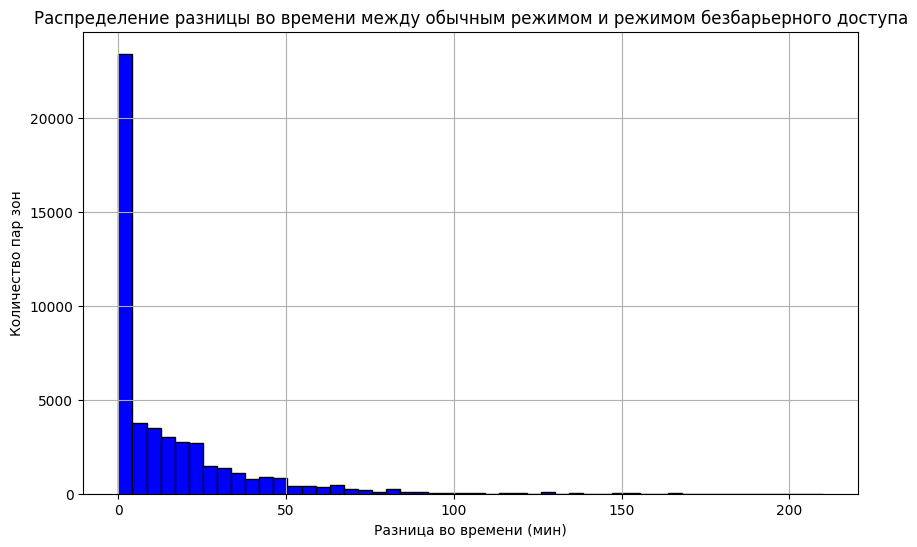

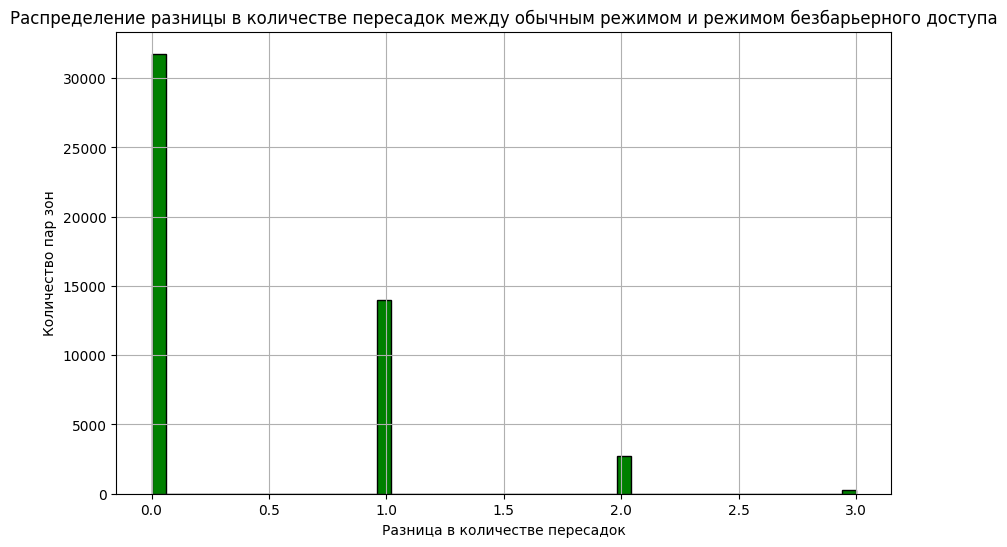

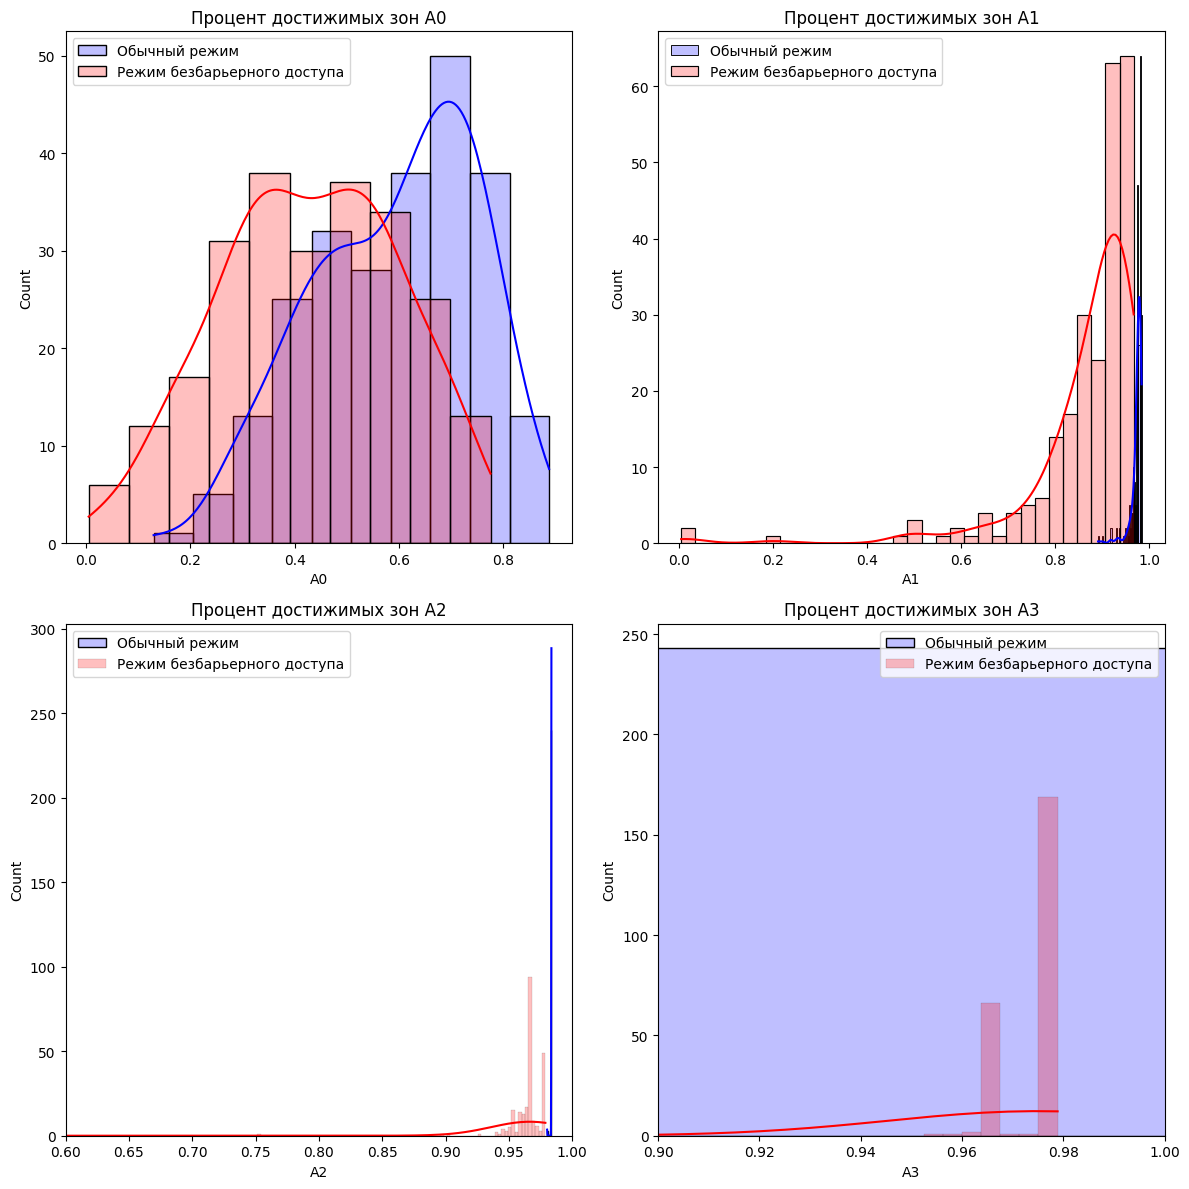

780


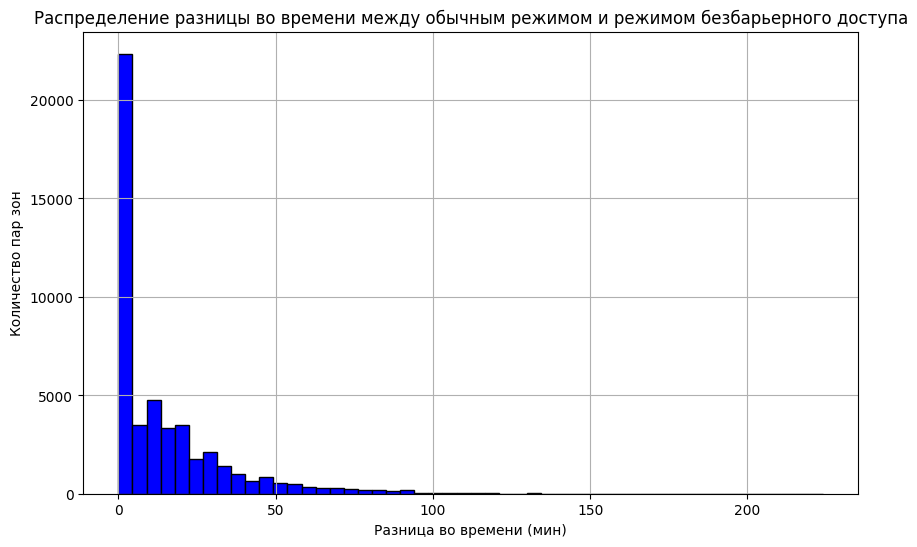

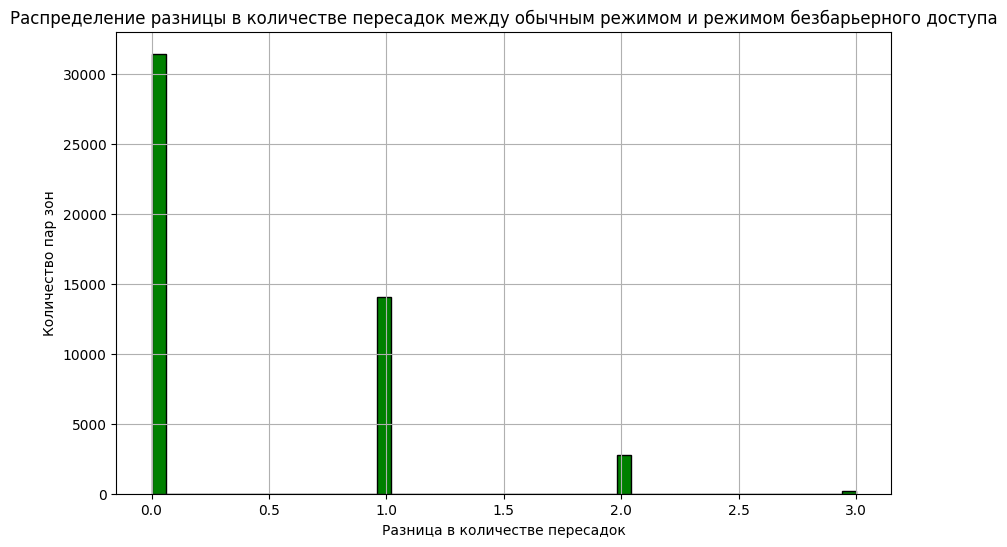

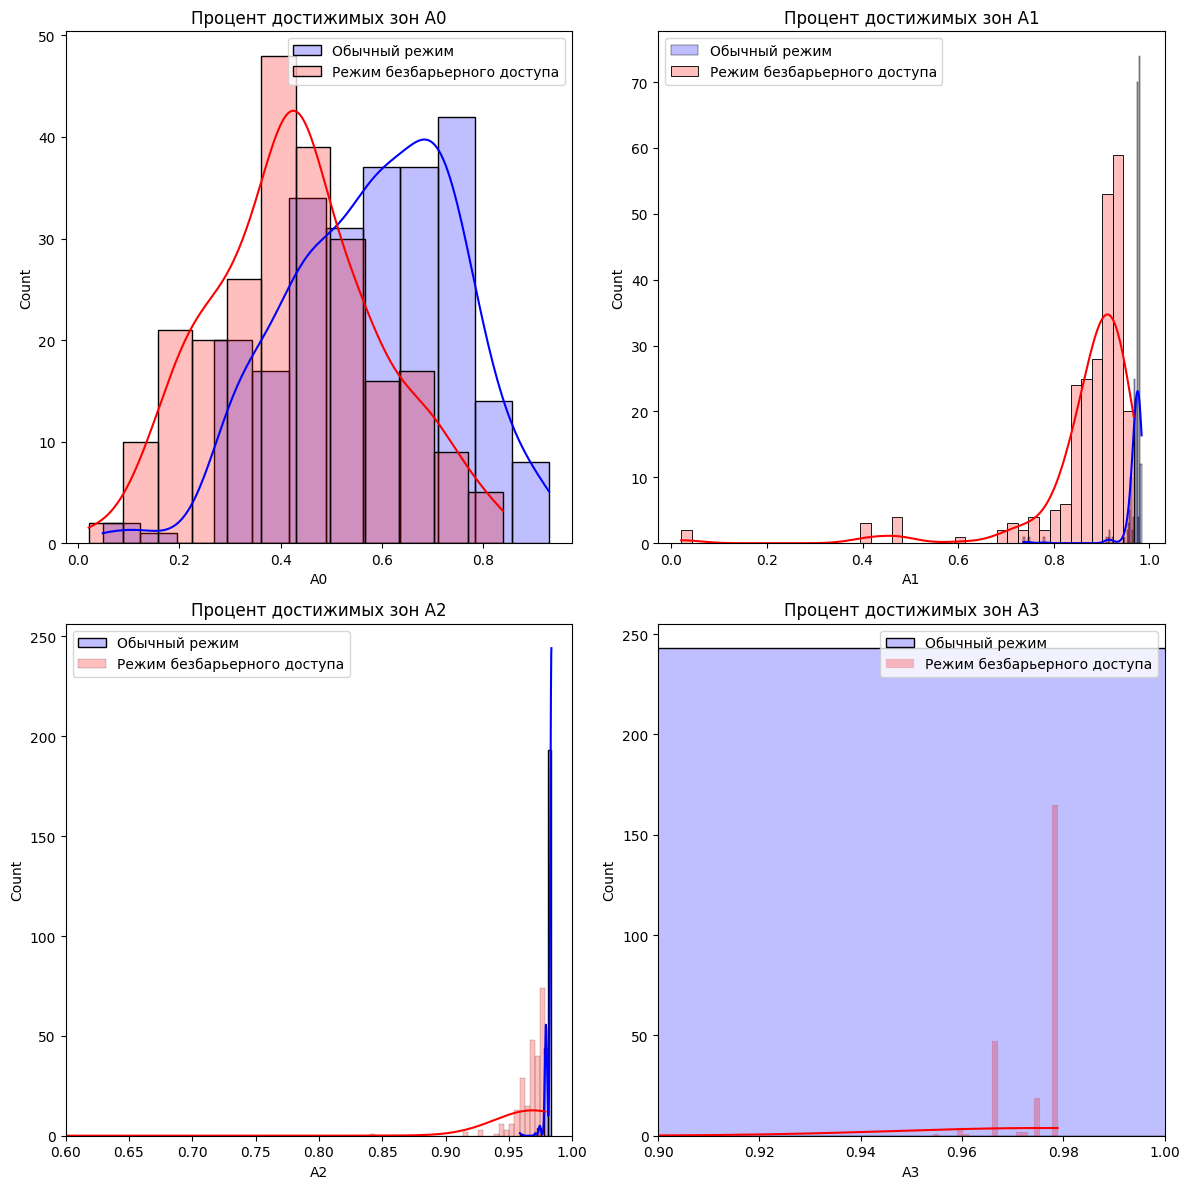

840


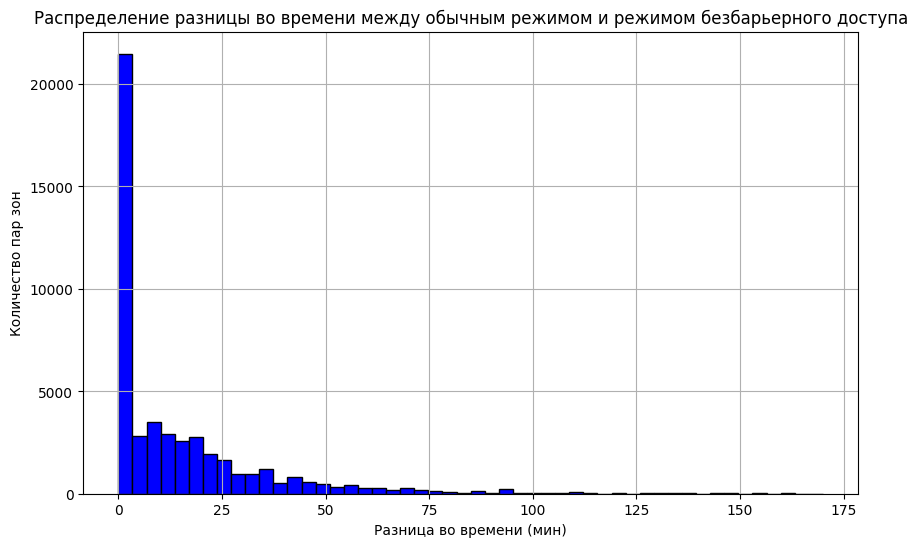

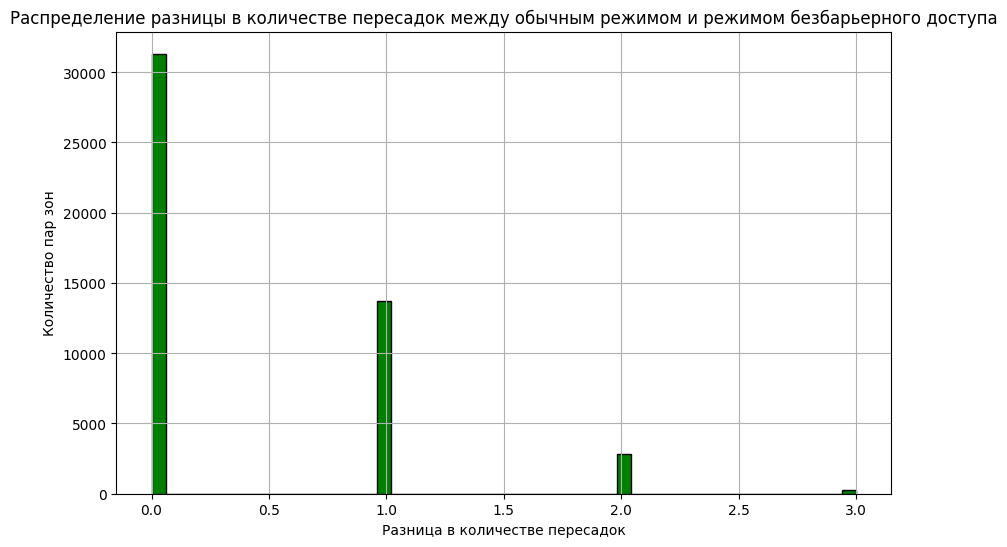

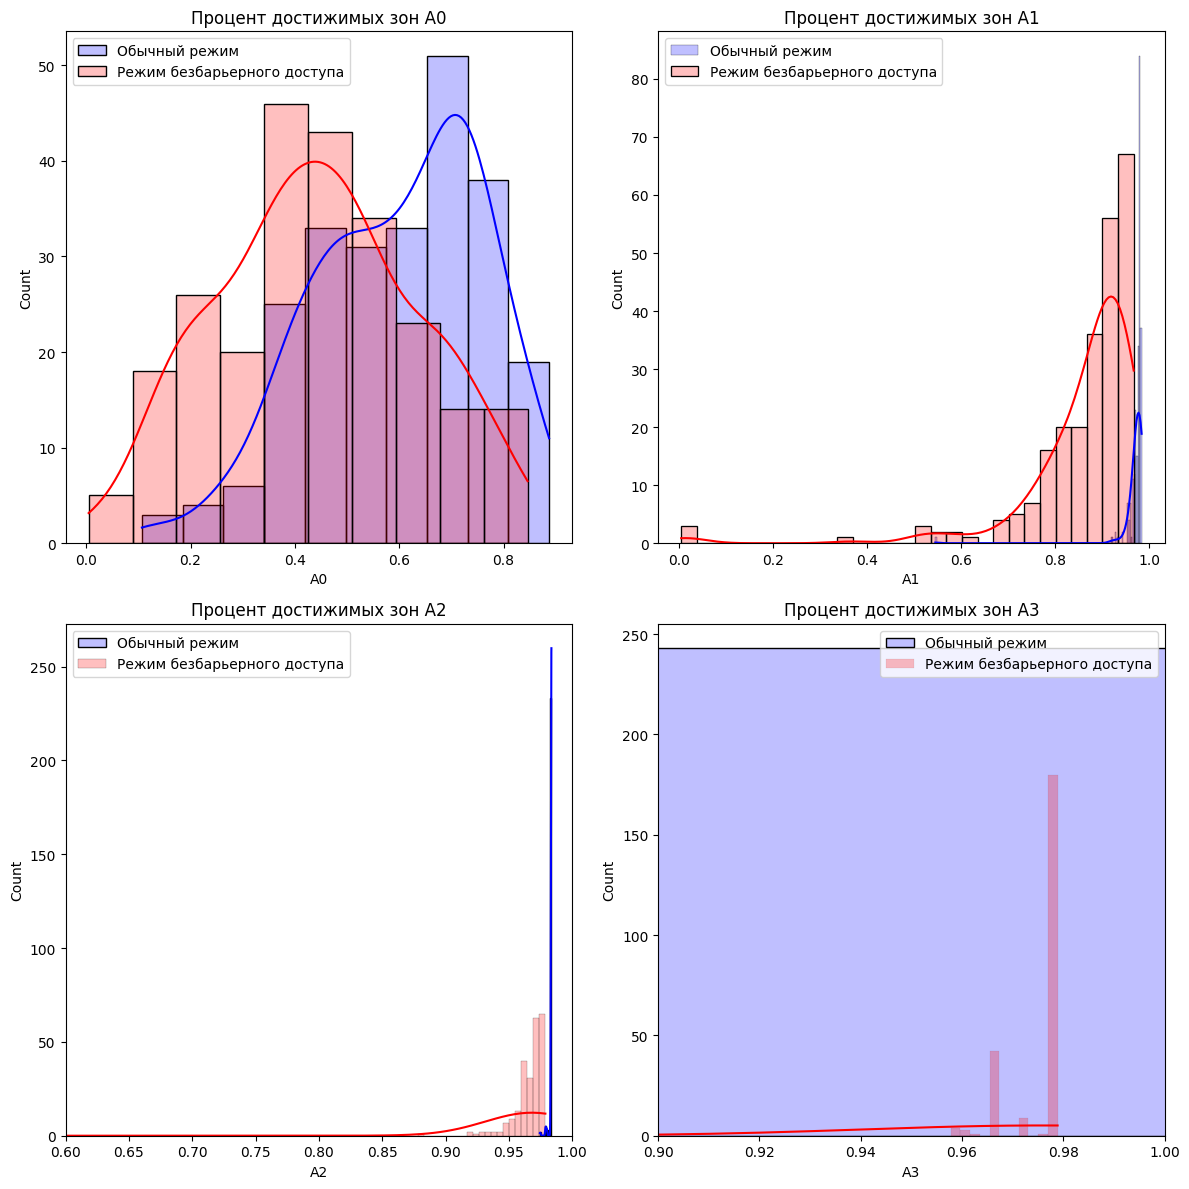

900


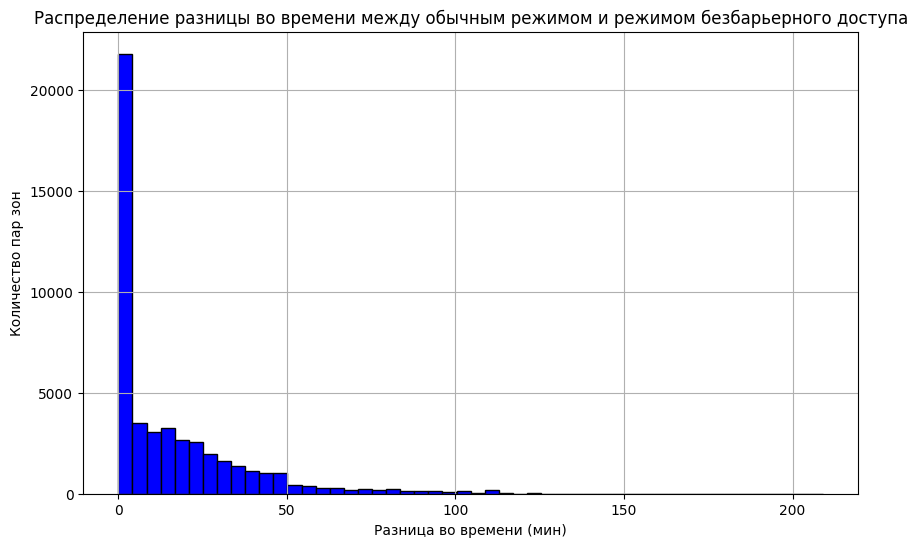

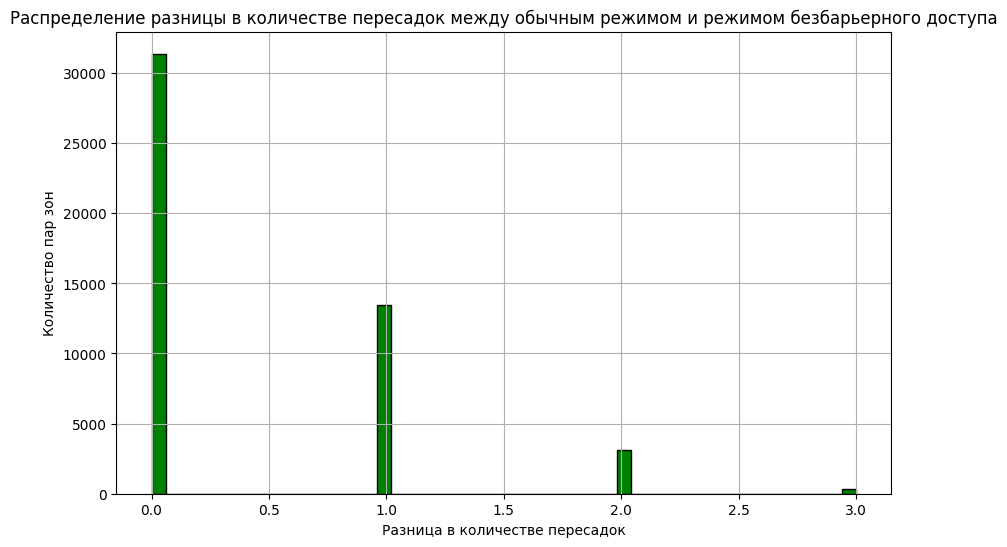

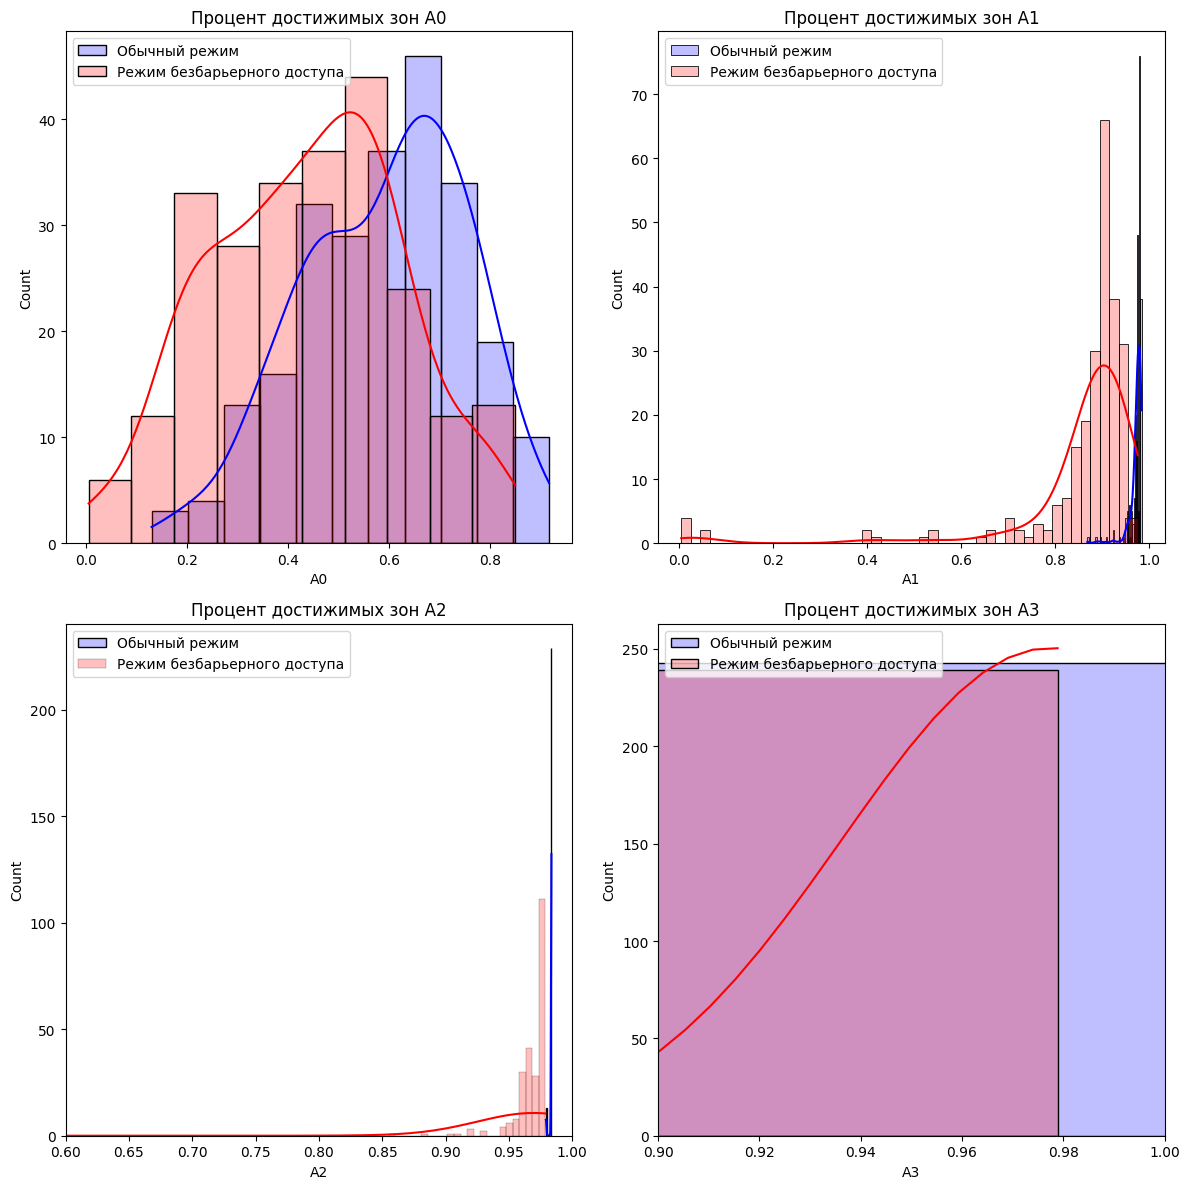

960


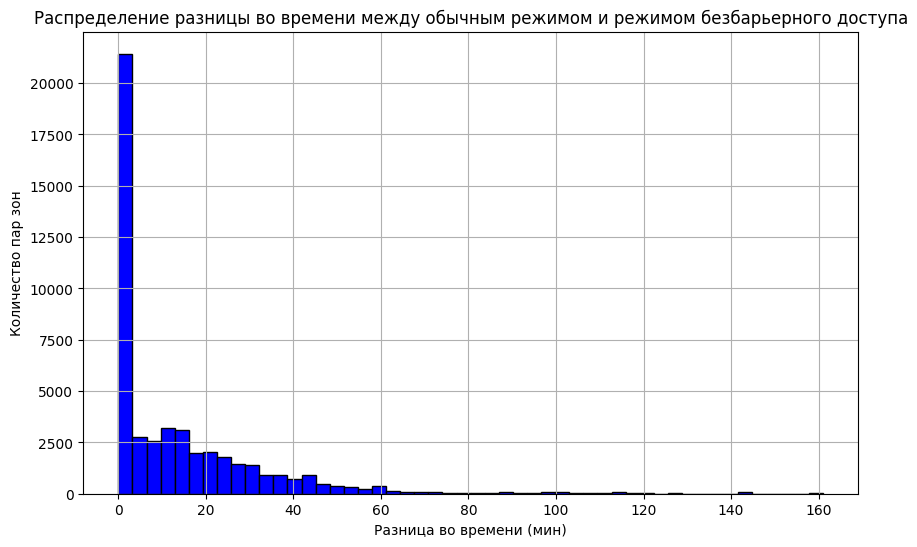

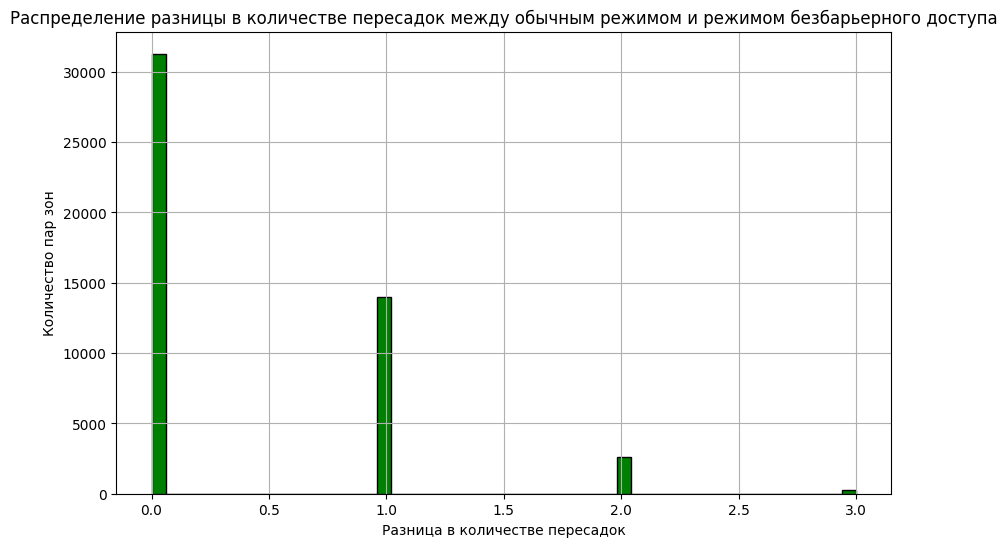

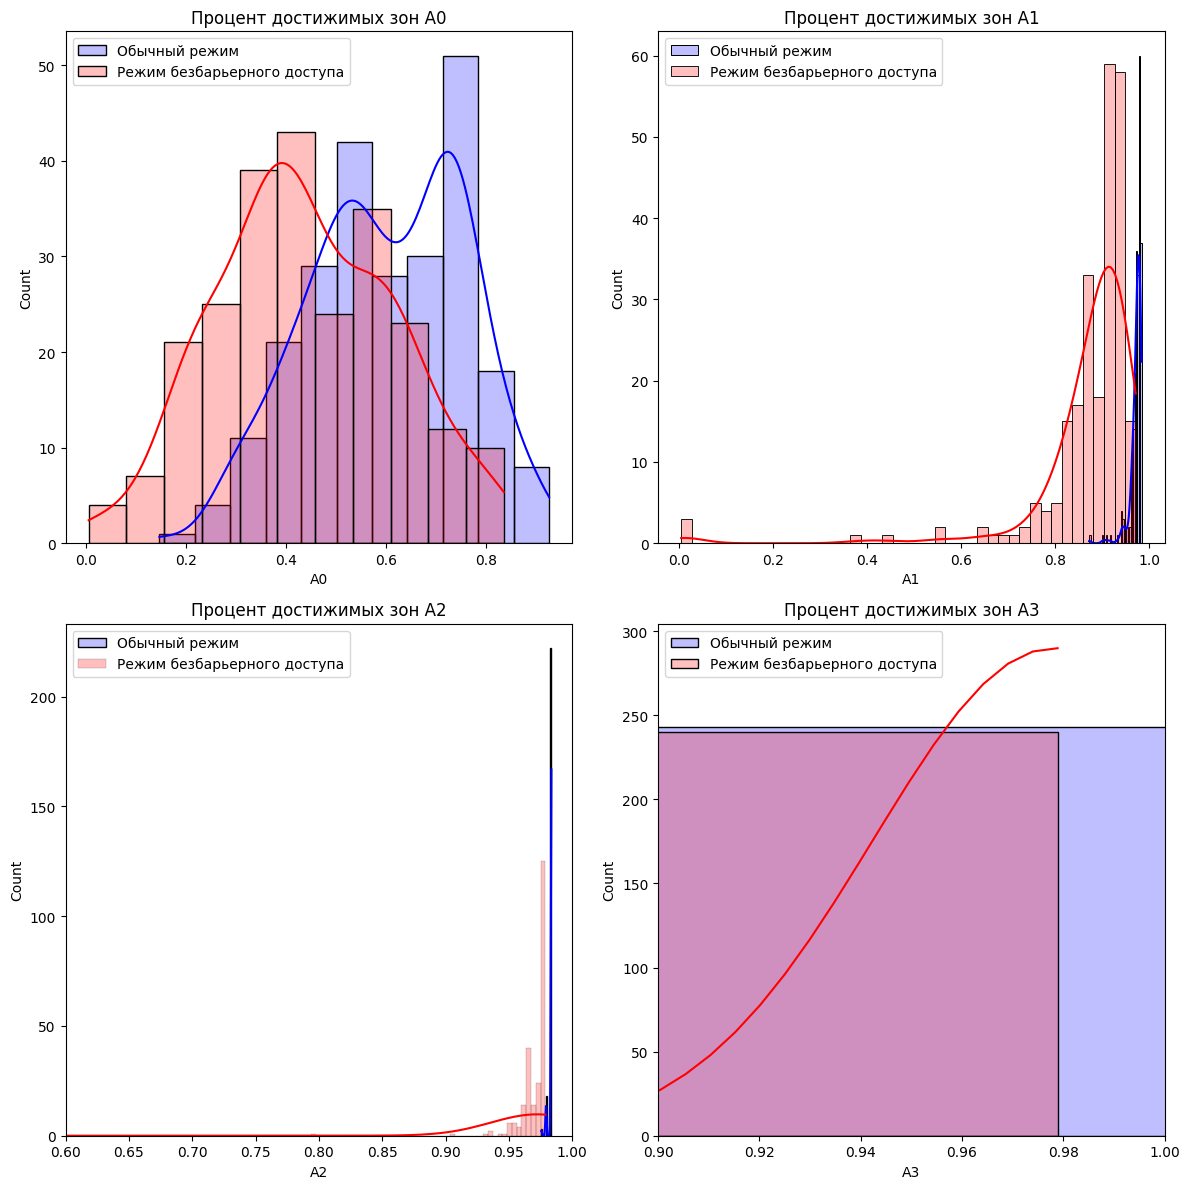

1020


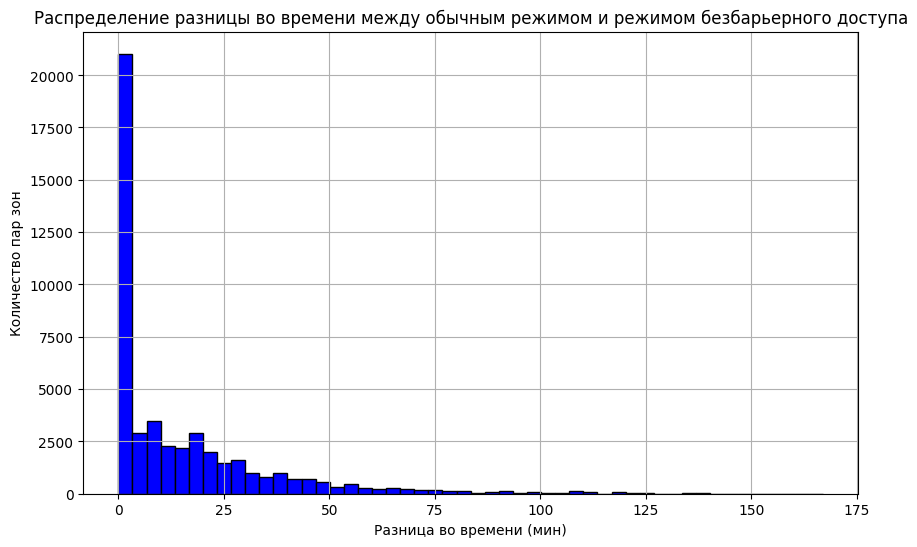

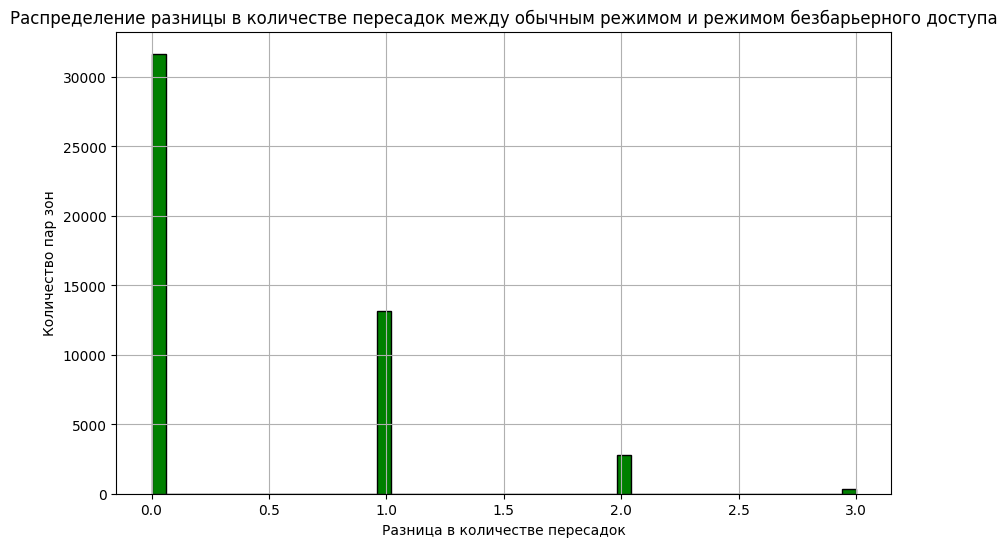

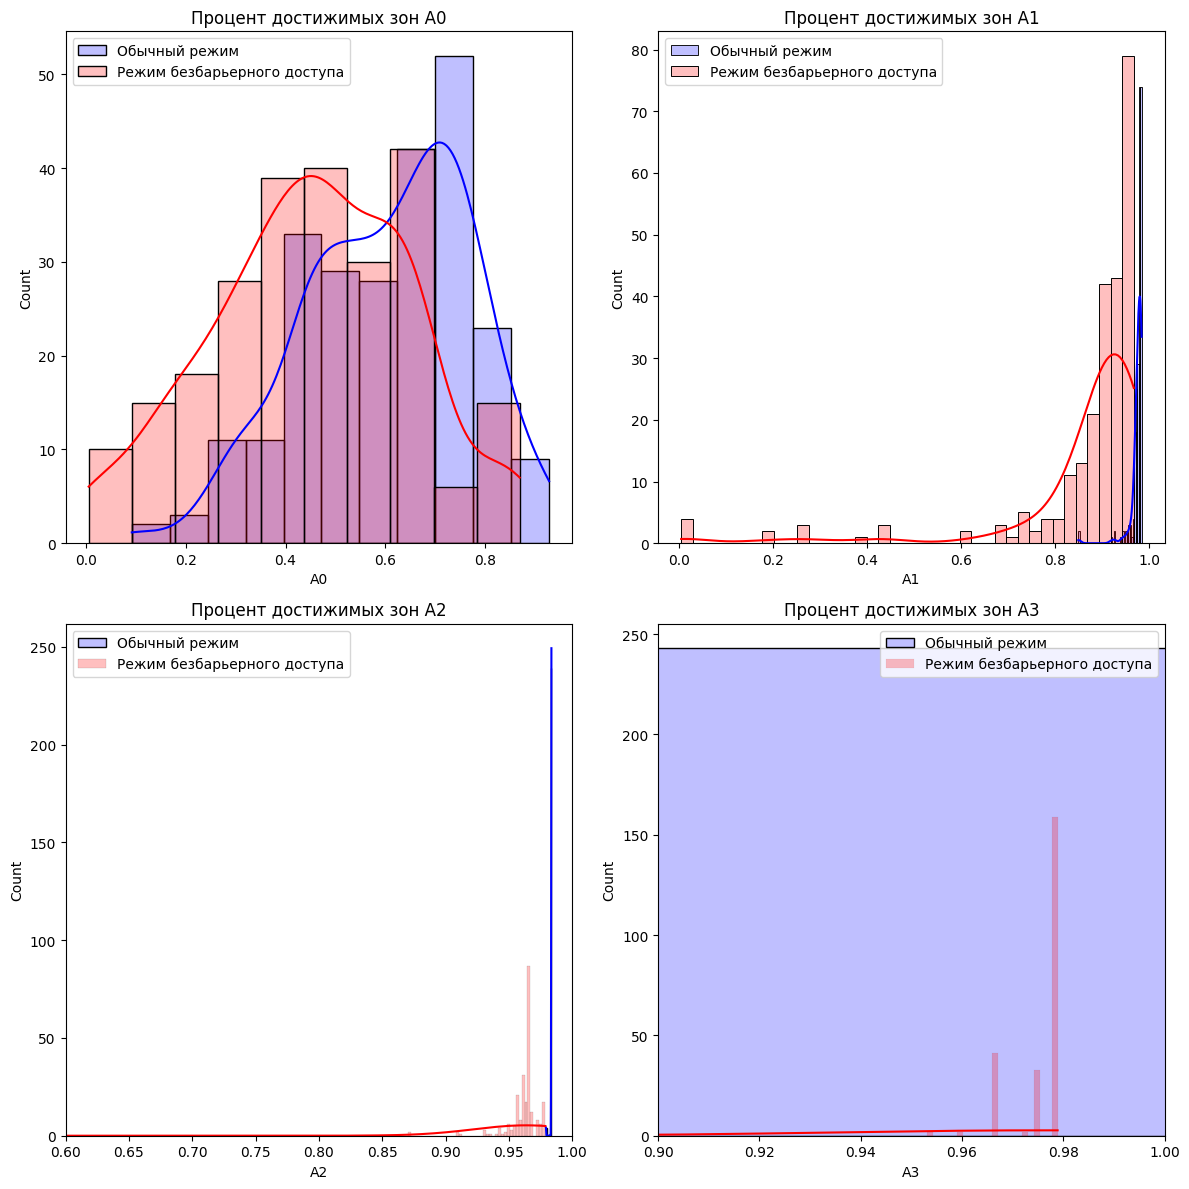

1080


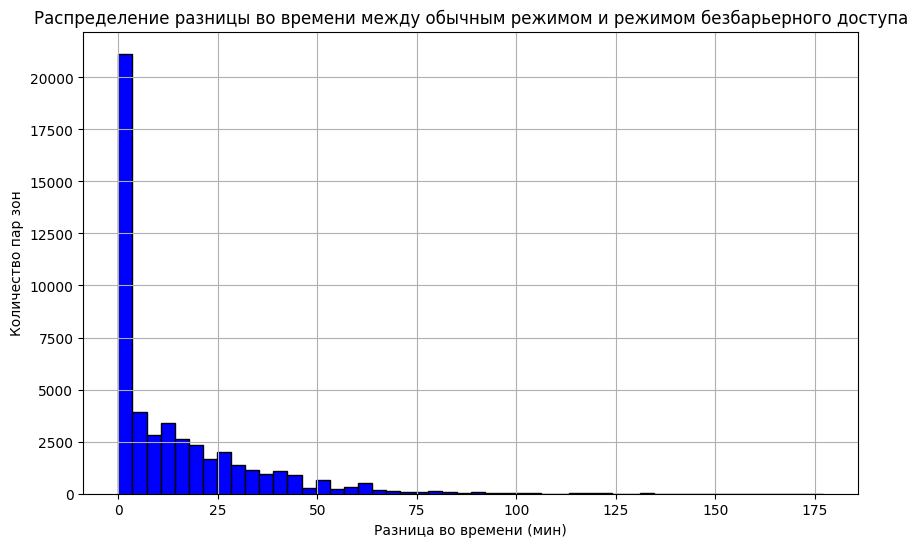

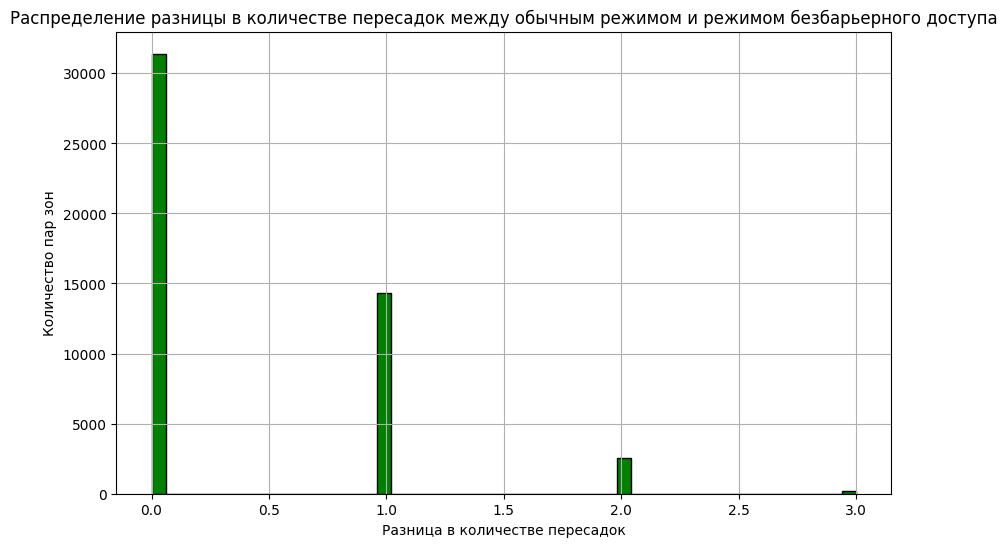

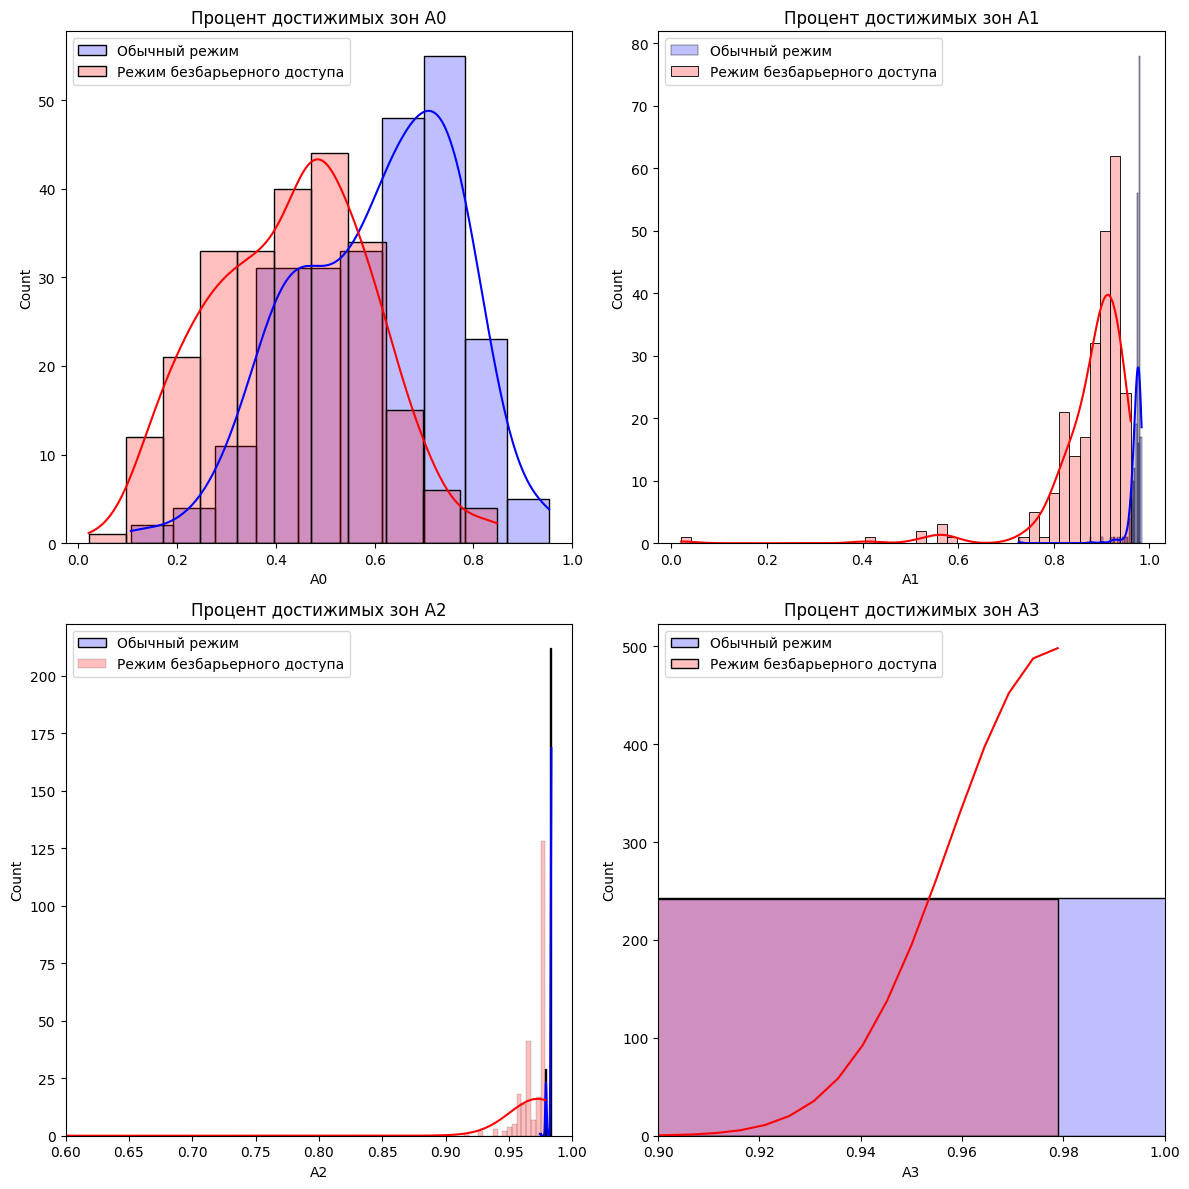

1140


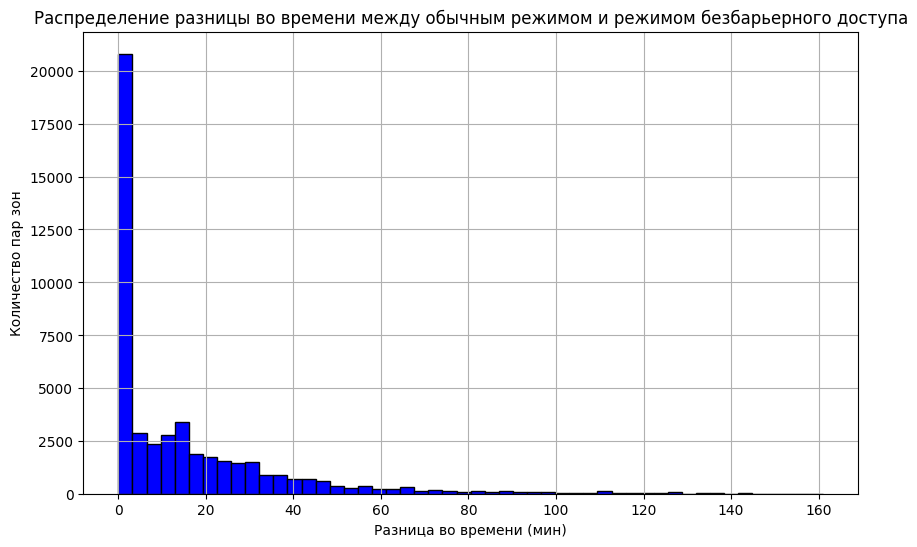

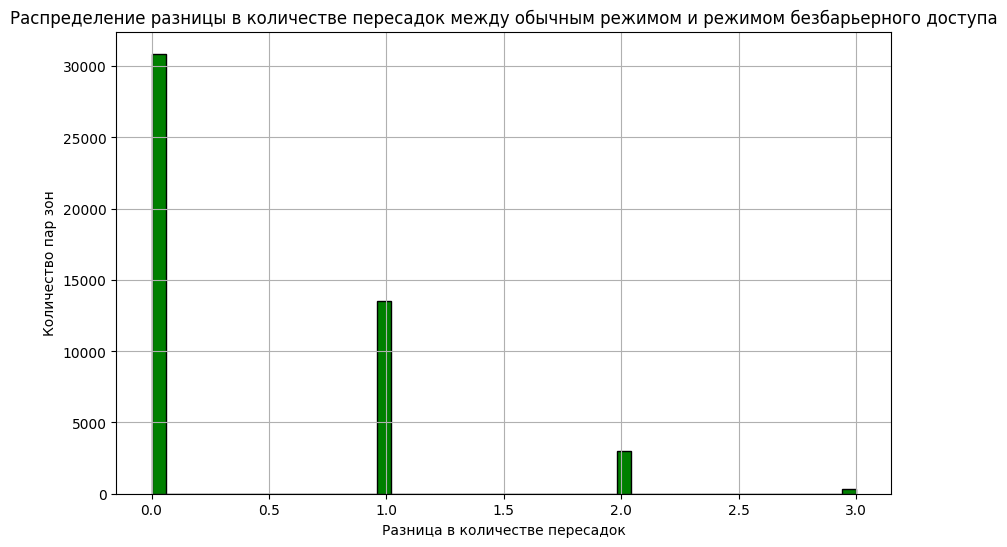

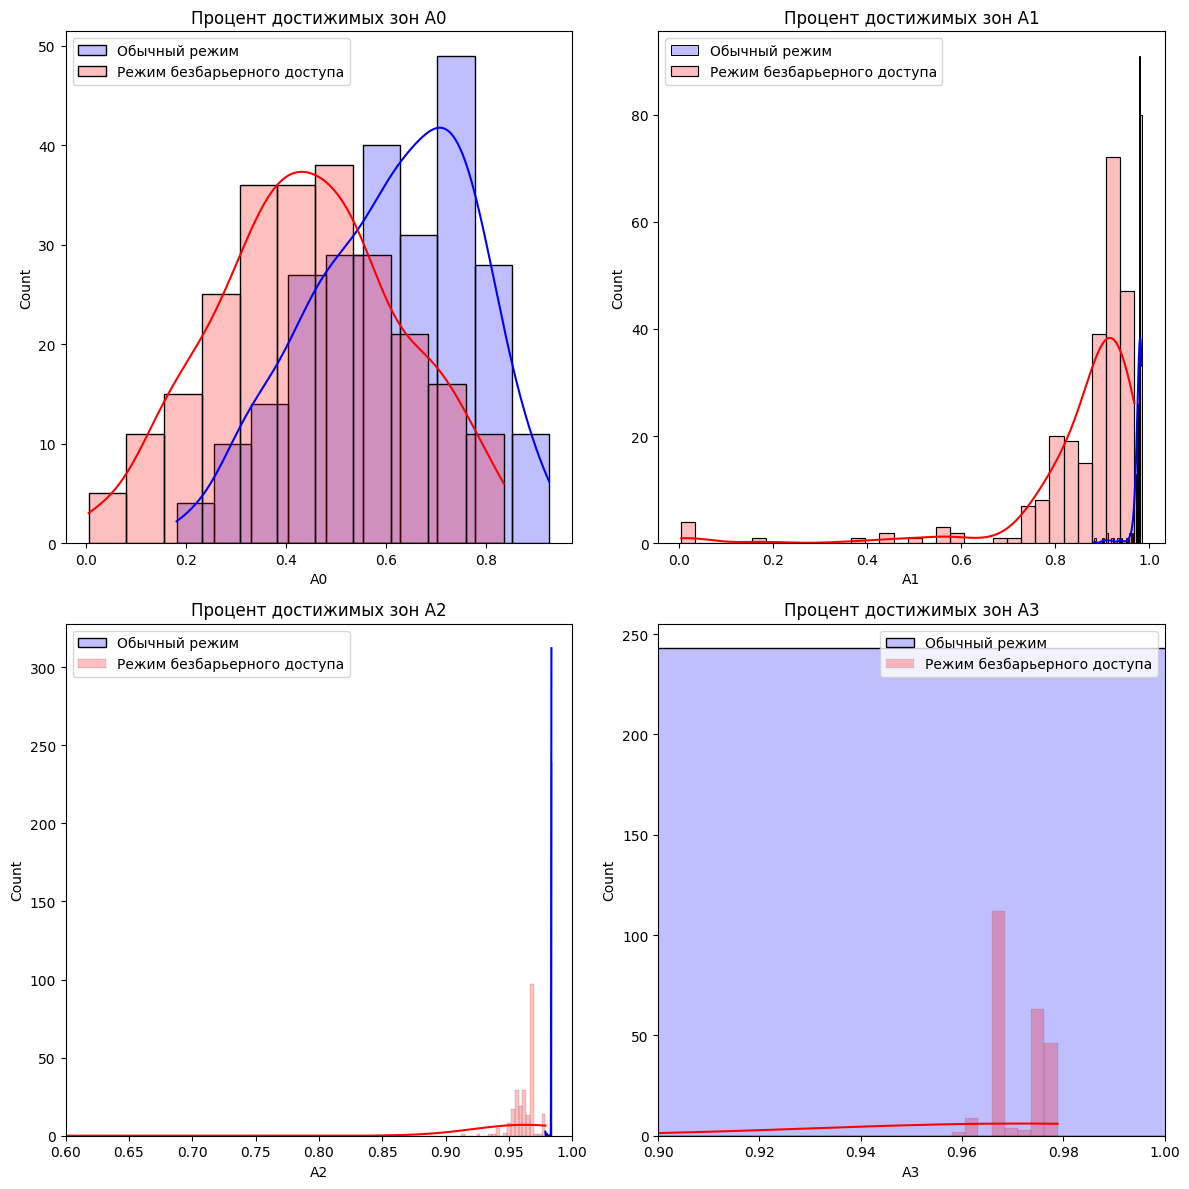

1200


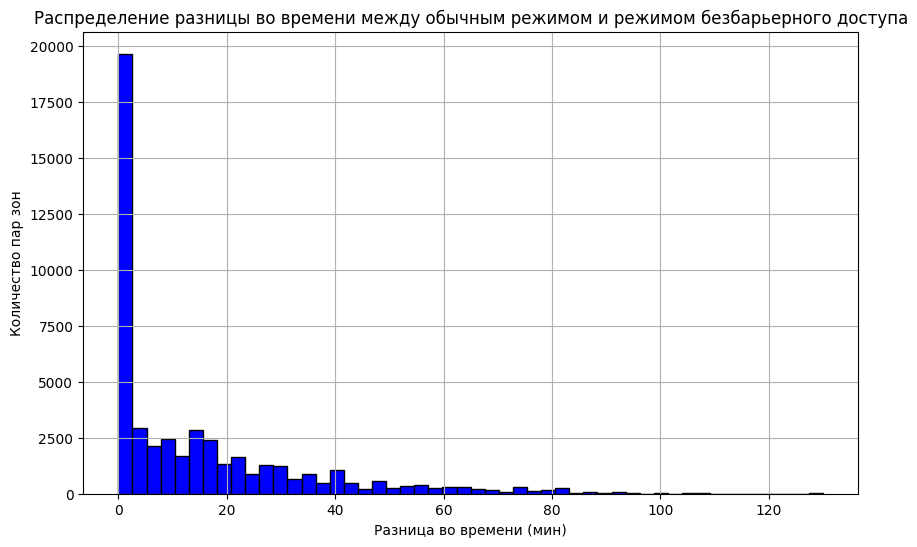

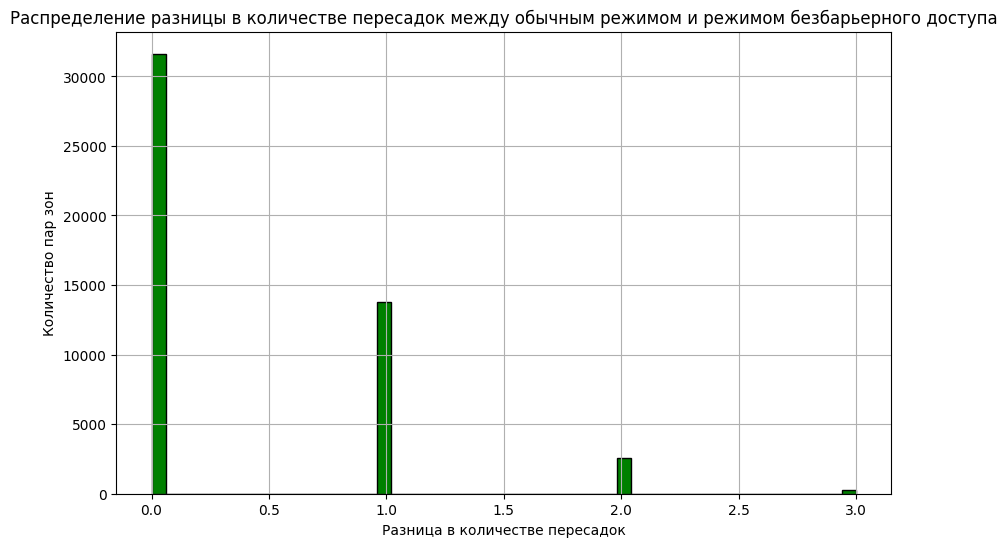

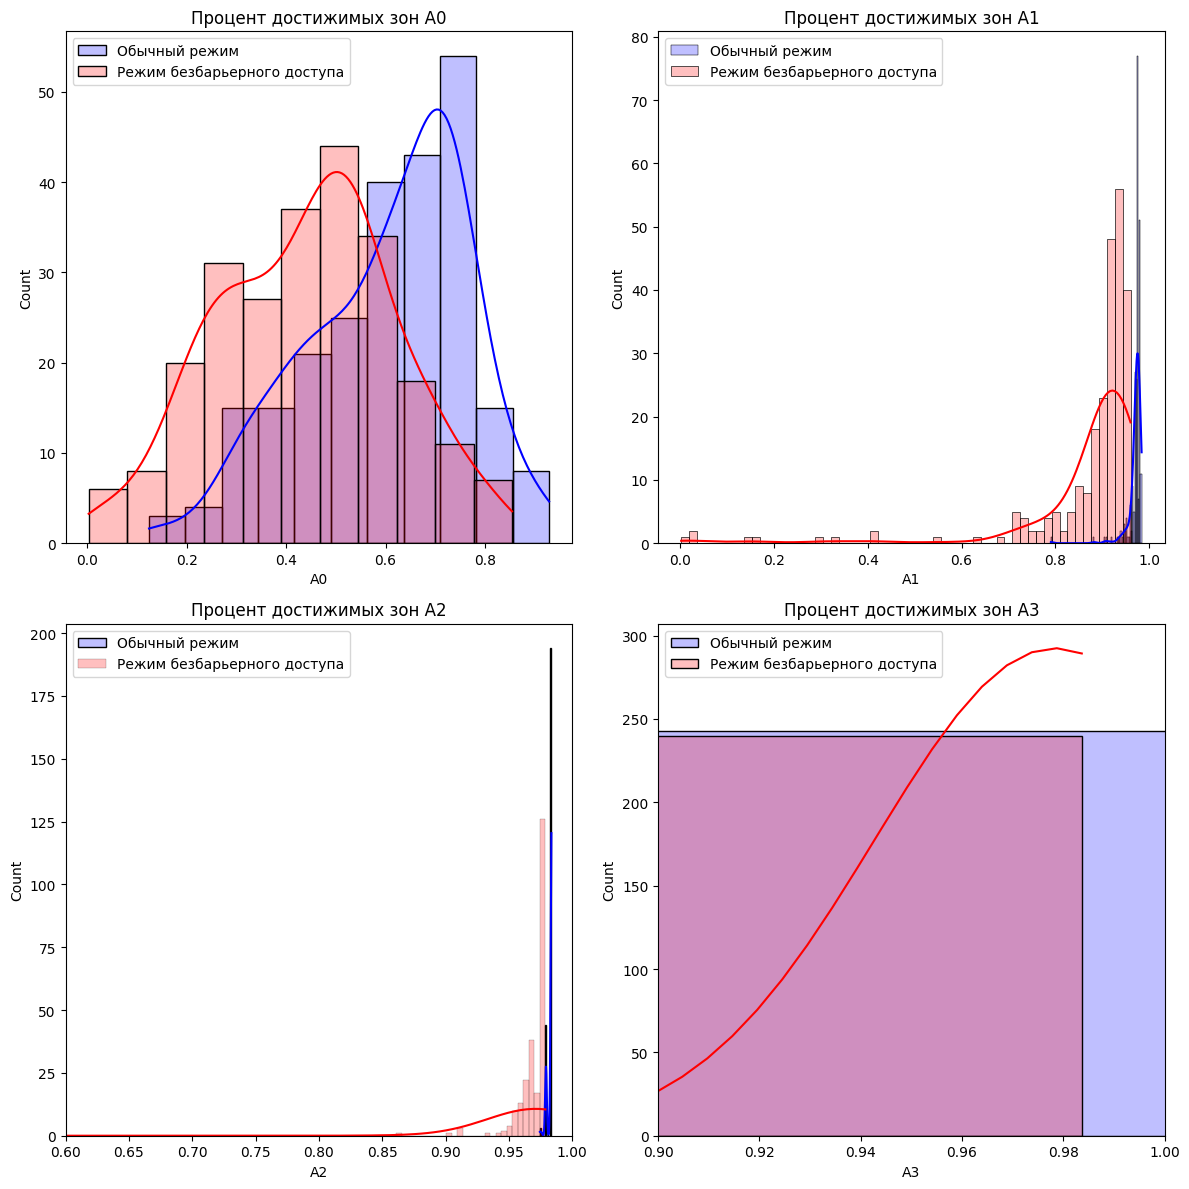

In [2]:
from AccessibilityEvaluators import DailyAccessibilityEvaluator

raptor_all=gpd.read_file(gpkg, layer='td_int3_all')
raptor_wh=gpd.read_file(gpkg, layer='td_int3_wh')
epsg=32646
#timemarks=[480, 780, 1080]
timemarks=[h for h in range(60*8, 60*21, 60)]
dae = DailyAccessibilityEvaluator(zones, raptor_all, raptor_wh, restr_type='wh', lr_sample='kja', timemarks=timemarks, epsg=epsg)
evals = dae.evals
gdf=dae.merge_daily_accessibility(evals)
#gdf.to_file(gpkg, layer='kja_daily_accessibility')

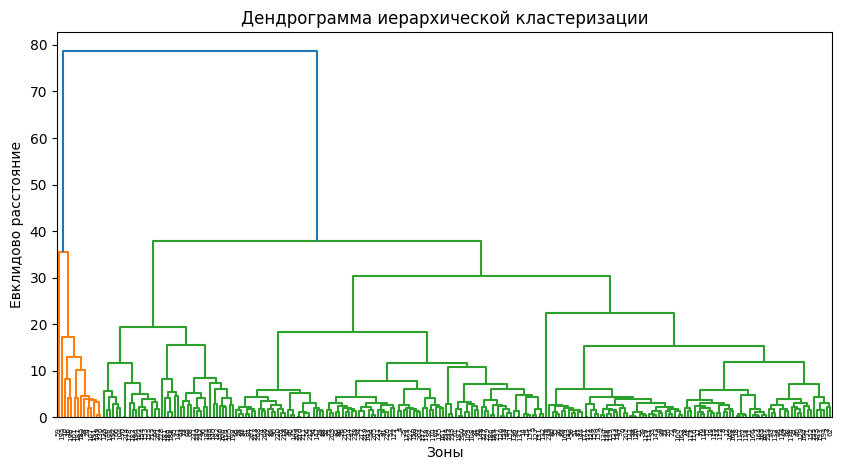

In [4]:
gdf_v=dae.calculate_variability(gdf.copy())
gdf_cl=dae.hierarchical_clustering(gdf_v, n_clusters=4, plot_dendrogram=True)
gdf_cl.to_file(gpkg, layer='kja_daily_accessibility_variability')

In [4]:
def calculate_variability(gdf):
    metrics = {
        'A0_delta': [col for col in gdf.columns if 'A0_delta' in col],
        'A1_delta': [col for col in gdf.columns if 'A1_delta' in col],
        'A2_delta': [col for col in gdf.columns if 'A2_delta' in col],
        'A3_delta': [col for col in gdf.columns if 'A3_delta' in col],
        'A': [col for col in gdf.columns if 'A' in col and 'delta' not in col and 'Aw' not in col],
        'A_norm': [col for col in gdf.columns if 'A_norm' in col],
        'Aw': [col for col in gdf.columns if 'Aw' in col],
        'Aw_norm': [col for col in gdf.columns if 'Aw_norm' in col],
        'mean_delta_time': [col for col in gdf.columns if 'mean_delta_time' in col],
        'mean_delta_transfers': [col for col in gdf.columns if 'mean_delta_transfers' in col]
    }

    new_columns = []
    
    for key, cols in metrics.items():
        if cols:  # Проверяем, есть ли такие колонки
            gdf[f'{key}_mean'] = gdf[cols].mean(axis=1)
            gdf[f'{key}_std'] = gdf[cols].std(axis=1)
            gdf[f'{key}_var'] = gdf[cols].var(axis=1)
            gdf[f'{key}_cv'] = gdf[f'{key}_std'] / gdf[f'{key}_mean']
            
            new_columns.extend([f'{key}_mean', f'{key}_std', f'{key}_var', f'{key}_cv'])
    new_columns.append('geometry')
    return gdf[new_columns]

gdf_v=calculate_variability(gdf.copy())
gdf_v.to_file(gpkg, layer='kja_daily_accessibility_variability')

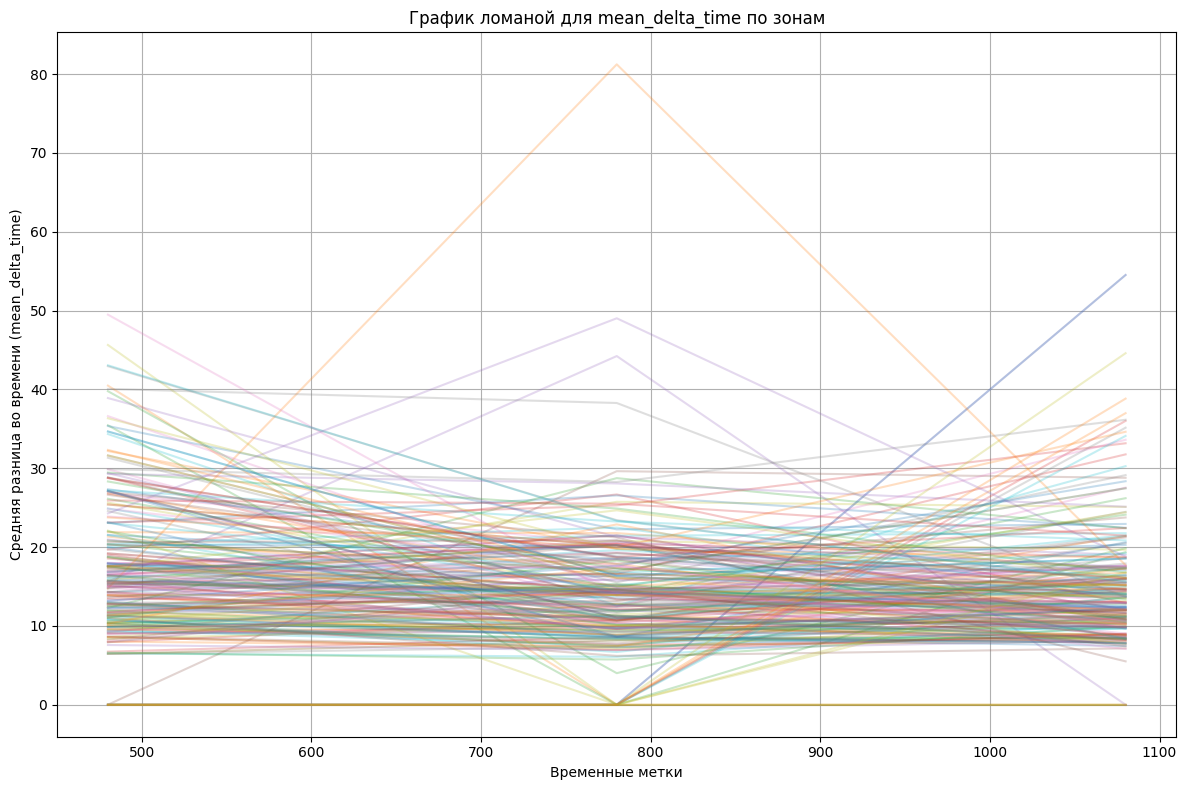

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_mean_delta_time(df: pd.DataFrame, timemarks: list):
    """
    Визуализирует график ломаной для каждой зоны mean_delta_time в зависимости от временных меток.

    Параметры:
    - df: DataFrame, содержащий данные с колонками mean_delta_time_at_{time} для каждой временной метки.
    - timemarks: список временных меток (например, [480, 780, 1080]).
    """
    # Проверяем, что временные метки существуют в DataFrame
    for time in timemarks:
        if f'mean_delta_time_at_{time}' not in df.columns:
            raise ValueError(f"Колонка 'mean_delta_time_at_{time}' отсутствует в DataFrame.")

    # Создаем фигуру и оси
    plt.figure(figsize=(12, 8))

    # Проходим по каждой зоне и строим график
    for idx, row in df.iterrows():
        zone_id = row['zone_id']
        mean_delta_times = [row[f'mean_delta_time_at_{time}'] for time in timemarks]
        
        # Строим ломаную для текущей зоны
        plt.plot(timemarks, mean_delta_times, alpha=0.25, label=f'Зона {zone_id}', marker=None)

    # Настройка графика
    plt.xlabel('Временные метки')
    plt.ylabel('Средняя разница во времени (mean_delta_time)')
    plt.title('График ломаной для mean_delta_time по зонам')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Легенда справа от графика
    plt.grid(True)
    plt.tight_layout()  # Чтобы легенда не перекрывала график

    # Показать график
    plt.show()
plot_mean_delta_time(dae.zones_values, timemarks=timemarks)